In [ ]:
import pandas as pd
import csv

input_file = "/content/Womens Clothing E-Commerce Reviews.csv"
output_file = "/content/duzenlenmis_veri.csv"
expected_columns = 11

cleaned_rows = []

# CSV dosyasını oku ve düzelt
with open(input_file, mode="r", encoding="utf-8") as file:
    reader = csv.reader(file)
    header = next(reader)  # Başlık satırını atla
    for row in reader:
        if len(row) == expected_columns:
            cleaned_rows.append(row)
        else:
            joined = ",".join(row)
            split_row = joined.split(",")
            if len(split_row) >= expected_columns:
                cleaned_rows.append(split_row[:expected_columns])
            else:
                split_row.extend([""] * (expected_columns - len(split_row)))
                cleaned_rows.append(split_row)

# Başlıklar
columns = [
    "Index",  # İlk sütun
    "Clothing ID", "Age", "Title", "Review Text", "Rating",
    "Recommended IND", "Positive Feedback Count",
    "Division Name", "Department Name", "Class Name"
]

# DataFrame oluştur ve Index sütunu ayarla
df = pd.DataFrame(cleaned_rows, columns=columns)
df.set_index("Index", inplace=True)

# Sayısal sütunları uygun tipe çevir
numeric_columns = ["Clothing ID", "Age", "Rating", "Recommended IND", "Positive Feedback Count"]
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Temiz CSV'yi kaydet
df.to_csv(output_file)
print("✅ Temizlenmiş ve indekslenmiş veri kaydedildi:", output_file)

# Kontrol için ilk 5 satırı göster
df.head()


✅ Temizlenmiş ve indekslenmiş veri kaydedildi: /content/duzenlenmis_veri.csv


,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
Index,,,,,,,,,,
0,767,33,,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [ ]:
output_excel_file = "/content/duzenlenmis_veri.xlsx"

# Excel olarak kaydet
df.to_excel(output_excel_file, engine="openpyxl")

print("✅ Excel dosyası kaydedildi:", output_excel_file)


✅ Excel dosyası kaydedildi: /content/duzenlenmis_veri.xlsx


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23486 non-null  int64 
 1   Age                      23486 non-null  int64 
 2   Title                    23486 non-null  object
 3   Review Text              23486 non-null  object
 4   Rating                   23486 non-null  int64 
 5   Recommended IND          23486 non-null  int64 
 6   Positive Feedback Count  23486 non-null  int64 
 7   Division Name            23486 non-null  object
 8   Department Name          23486 non-null  object
 9   Class Name               23486 non-null  object
dtypes: int64(5), object(5)
memory usage: 2.0+ MB


In [ ]:
df.describe()


,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,918.118709,43.198544,4.196032,0.822362,2.535936
std,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,18.000000,1.000000,0.000000,0.000000
25%,861.000000,34.000000,4.000000,1.000000,0.000000
50%,936.000000,41.000000,5.000000,1.000000,1.000000
75%,1078.000000,52.000000,5.000000,1.000000,3.000000
max,1205.000000,99.000000,5.000000,1.000000,122.000000


In [ ]:
df.columns


Index(['Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [ ]:
print("🔹 Genel Bilgi:")
print(df.info())

# Tüm sütunlardaki eksik değer sayısı
print("\n🔹 Eksik Değer Sayısı:")
print(df.isnull().sum())

# Sayısal (nicel) sütunlar
print("\n🔹 Sayısal (nicel) sütunlar:")
print(df.select_dtypes(include=['int64', 'float64']).columns.tolist())

# Kategorik sütunlar (örnek olarak object tipinde olup az sayıda farklı değere sahip olanlar)
print("\n🔹 Kategorik sütunlar:")
for col in df.select_dtypes(include='object').columns:
    if df[col].nunique() < 30:
        print(f"{col} - Benzersiz değer sayısı: {df[col].nunique()}")

# Nitel (metinsel) sütunlar
print("\n🔹 Nitel (metinsel) sütunlar:")
for col in df.select_dtypes(include='object').columns:
    if df[col].nunique() >= 30:
        print(f"{col} - Benzersiz değer sayısı: {df[col].nunique()}")

🔹 Genel Bilgi:
<class 'pandas.core.frame.DataFrame'>
Index: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23486 non-null  int64 
 1   Age                      23486 non-null  int64 
 2   Title                    23486 non-null  object
 3   Review Text              23486 non-null  object
 4   Rating                   23486 non-null  int64 
 5   Recommended IND          23486 non-null  int64 
 6   Positive Feedback Count  23486 non-null  int64 
 7   Division Name            23486 non-null  object
 8   Department Name          23486 non-null  object
 9   Class Name               23486 non-null  object
dtypes: int64(5), object(5)
memory usage: 2.0+ MB
None

🔹 Eksik Değer Sayısı:
Clothing ID                0
Age                        0
Title                      0
Review Text                0
Rating                     0
Recommended IND       

In [ ]:
# Boş veya sadece boşluk içeren title değerlerini tespit et
empty_titles = df['Title'].apply(lambda x: str(x).strip() == "")
print("🔹 Boş veya sadece boşluk olan Title sayısı:", empty_titles.sum())

# Gerekirse bu satırları gözlemlemek
print(df[empty_titles].head())


🔹 Boş veya sadece boşluk olan Title sayısı: 3810
       Clothing ID  Age Title  \
Index                           
0              767   33         
1             1080   34         
11            1095   39         
30            1060   33         
36            1002   29         

                                             Review Text  Rating  \
Index                                                              
0      Absolutely wonderful - silky and sexy and comf...       4   
1      Love this dress!  it's sooo pretty.  i happene...       5   
11     This dress is perfection! so pretty and flatte...       5   
30     Beautifully made pants and on trend with the f...       5   
36     This is a comfortable skirt that can span seas...       4   

       Recommended IND  Positive Feedback Count   Division Name  \
Index                                                             
0                    1                        0       Initmates   
1                    1                   

In [ ]:
# Title boşsa, Review Text'in ilk cümlesiyle doldur
def fill_title_from_review(row):
    if str(row['Title']).strip() == "":
        review = str(row['Review Text'])
        return review.split('.')[0].strip() if '.' in review else review.strip()
    return row['Title']

# Uygulama
df['Title'] = df.apply(fill_title_from_review, axis=1)


In [ ]:
# Her sütundaki boş, sadece boşluk veya NaN olan hücre sayısını göster
for col in df.columns:
    missing_count = df[col].apply(lambda x: pd.isna(x) or str(x).strip() == "").sum()
    if missing_count > 0:
        print(f"🔹 {col} sütununda {missing_count} eksik veya boş değer var.")


🔹 Title sütununda 844 eksik veya boş değer var.
🔹 Review Text sütununda 845 eksik veya boş değer var.
🔹 Division Name sütununda 14 eksik veya boş değer var.
🔹 Department Name sütununda 14 eksik veya boş değer var.
🔹 Class Name sütununda 14 eksik veya boş değer var.


In [ ]:
# 1. Review Text boş olanları tamamen çıkar (NLP için gerekli)
df = df[df['Review Text'].apply(lambda x: str(x).strip() != "")]

# 2. Title boşsa, Review Text'in ilk cümlesiyle doldur
def fill_title_from_review(row):
    if str(row['Title']).strip() == "":
        review = str(row['Review Text'])
        return review.split('.')[0].strip() if '.' in review else review.strip()
    return row['Title']

df['Title'] = df.apply(fill_title_from_review, axis=1)

# 3. Kategorik sütunlardaki boşlukları "Unknown" ile doldur
for col in ['Division Name', 'Department Name', 'Class Name']:
    df[col] = df[col].replace("", "Unknown").fillna("Unknown")


In [ ]:
missing_found = False

for col in df.columns:
    missing_count = df[col].apply(lambda x: pd.isna(x) or str(x).strip() == "").sum()
    if missing_count > 0:
        print(f"🔹 {col} sütununda {missing_count} eksik veya boş değer var.")
        missing_found = True

if not missing_found:
    print("✅ Eksik veri yok.")



✅ Eksik veri yok.


In [ ]:
import string

def clean_text(text):
    text = str(text).lower()  # Küçük harfe çevir
    text = text.translate(str.maketrans('', '', string.punctuation))  # Noktalama işaretlerini kaldır
    text = text.strip()  # Baş ve sondaki boşlukları sil
    return text

df['Cleaned_Review_Text'] = df['Review Text'].apply(clean_text)
df['Cleaned_Title'] = df['Title'].apply(clean_text)


In [ ]:
import nltk
import re
from nltk.corpus import stopwords

# Stopwords listesini ilk kez indiriyorsan bu satırı çalıştır:
nltk.download('stopwords')

# Türkçe durak kelimeleri al
stop_words = set(stopwords.words('turkish'))

# Temizlik ve stopword kaldırma fonksiyonu
def clean_text(text):
    text = str(text).lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.strip()
    text = re.sub('\s+', ' ', text)
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)

# Uygulama örneği (dataframe'deki sütunlara uygula)
df['Cleaned_Review_Text'] = df['Review Text'].apply(clean_text)
df['Cleaned_Title'] = df['Title'].apply(clean_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Karakter sayısı
df['review_length'] = df['Review Text'].astype(str).apply(len)

# Kelime sayısı
df['review_word_count'] = df['Review Text'].astype(str).apply(lambda x: len(x.split()))

In [ ]:
def clean_text_special(text):
    text = str(text).lower()                              # Küçük harfe çevir
    text = re.sub(r'[^a-z\s]', '', text)                  # Sadece harf ve boşluk bırak (özel karakter & sayı gider)
    text = re.sub(r'\s+', ' ', text).strip()              # Fazla boşlukları temizle
    return text

# Uygulama
df['cleaned_review'] = df['Review Text'].apply(clean_text_special)

In [ ]:
df.to_excel('womens_clothing_reviews.xlsx', index=False)

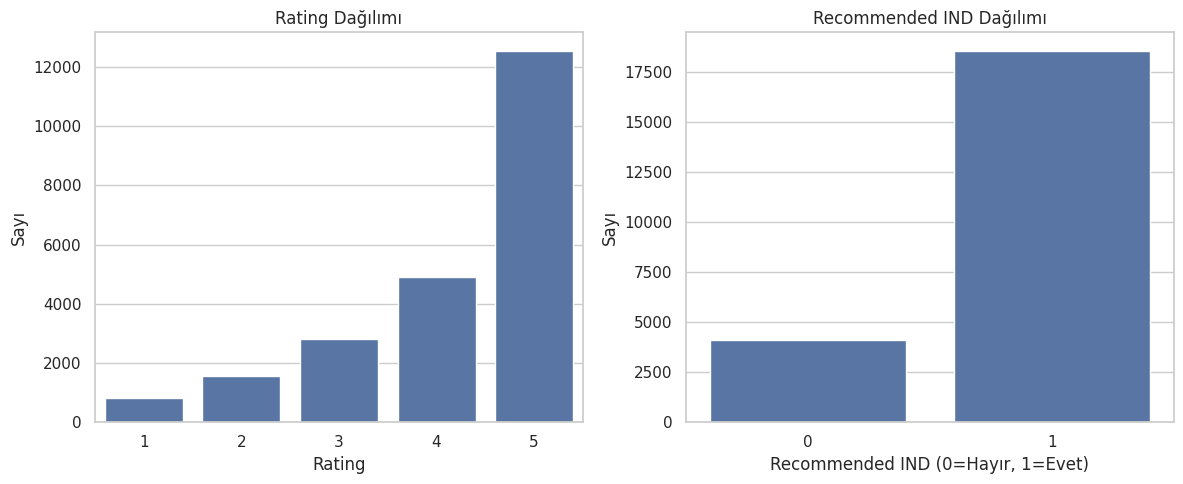

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.countplot(x='Rating', data=df)
plt.title('Rating Dağılımı')
plt.xlabel('Rating')
plt.ylabel('Sayı')

plt.subplot(1, 2, 2)
sns.countplot(x='Recommended IND', data=df)
plt.title('Recommended IND Dağılımı')
plt.xlabel('Recommended IND (0=Hayır, 1=Evet)')
plt.ylabel('Sayı')

plt.tight_layout()
plt.show()



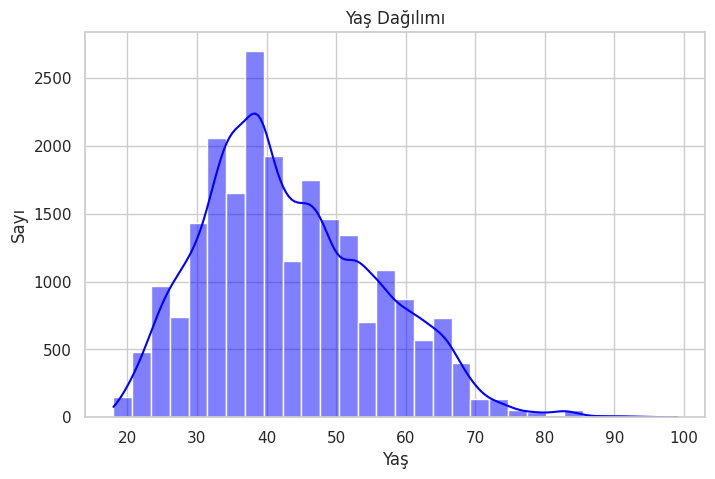

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=30, kde=True, color='blue')
plt.title('Yaş Dağılımı')
plt.xlabel('Yaş')
plt.ylabel('Sayı')
plt.show()



In [ ]:
bins = [0, 20, 30, 40, 50, 60, 100]
labels = ['<20', '20-29', '30-39', '40-49', '50-59', '60+']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)


In [ ]:
group_stats = df.groupby('Age_Group', observed=False).agg(
    avg_rating=('Rating', 'mean'),
    recommend_rate=('Recommended IND', 'mean'),
    count=('Age', 'count')
).reset_index()

print(group_stats)


  Age_Group  avg_rating  recommend_rate  count
0       <20    4.227273        0.886364     44
1     20-29    4.192129        0.812522   2795
2     30-39    4.153281        0.808603   7346
3     40-49    4.141962        0.808233   5903
4     50-59    4.226395        0.835681   3834
5       60+    4.285767        0.851416   2719


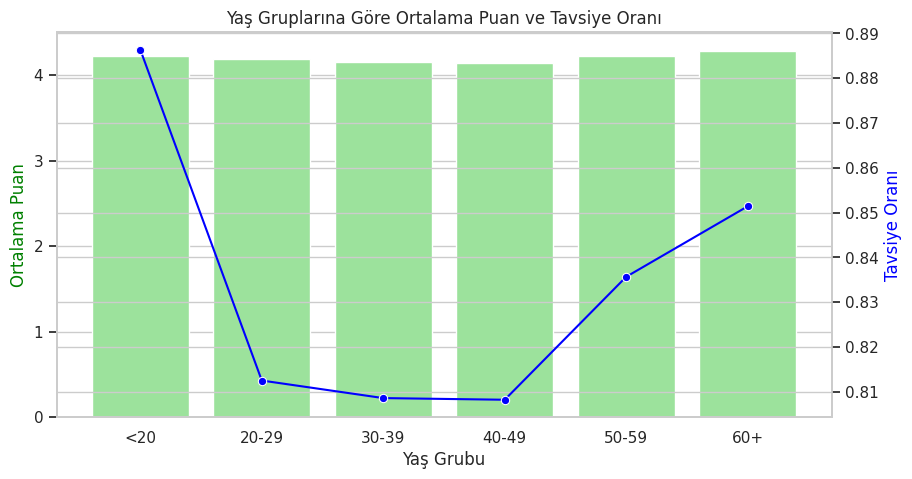

In [ ]:
fig, ax1 = plt.subplots(figsize=(10,5))

sns.barplot(x='Age_Group', y='avg_rating', data=group_stats, ax=ax1, color='lightgreen')
ax1.set_ylabel('Ortalama Puan', color='green')
ax1.set_xlabel('Yaş Grubu')

ax2 = ax1.twinx()
sns.lineplot(x='Age_Group', y='recommend_rate', data=group_stats, ax=ax2, color='blue', marker='o')
ax2.set_ylabel('Tavsiye Oranı', color='blue')

plt.title('Yaş Gruplarına Göre Ortalama Puan ve Tavsiye Oranı')
plt.show()


In [ ]:
# Division bazında
division_stats = df.groupby('Division Name', observed=False).agg(
    avg_rating=('Rating', 'mean'),
    recommend_rate=('Recommended IND', 'mean'),
    count=('Rating', 'count')
).reset_index()

# Department bazında
department_stats = df.groupby('Department Name', observed=False).agg(
    avg_rating=('Rating', 'mean'),
    recommend_rate=('Recommended IND', 'mean'),
    count=('Rating', 'count')
).reset_index()

# Class bazında
class_stats = df.groupby('Class Name', observed=False).agg(
    avg_rating=('Rating', 'mean'),
    recommend_rate=('Recommended IND', 'mean'),
    count=('Rating', 'count')
).reset_index()


In [ ]:
print(division_stats.sort_values(by='recommend_rate', ascending=False))


    Division Name  avg_rating  recommend_rate  count
3         Unknown    5.000000        1.000000     13
2       Initmates    4.275596        0.847826   1426
1  General Petite    4.196631        0.822509   7837
0         General    4.165282        0.813468  13365


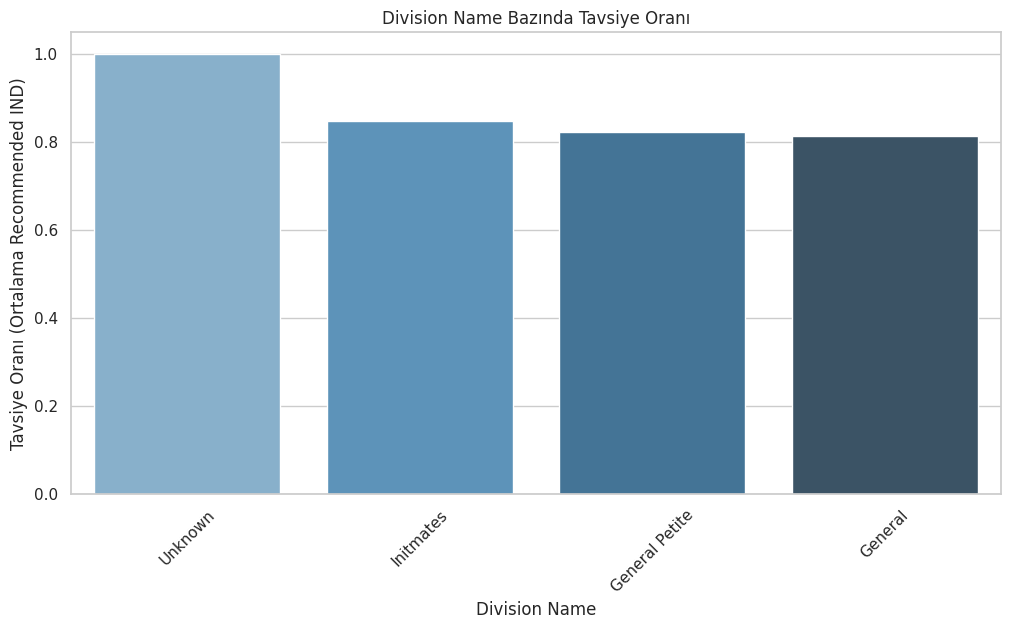

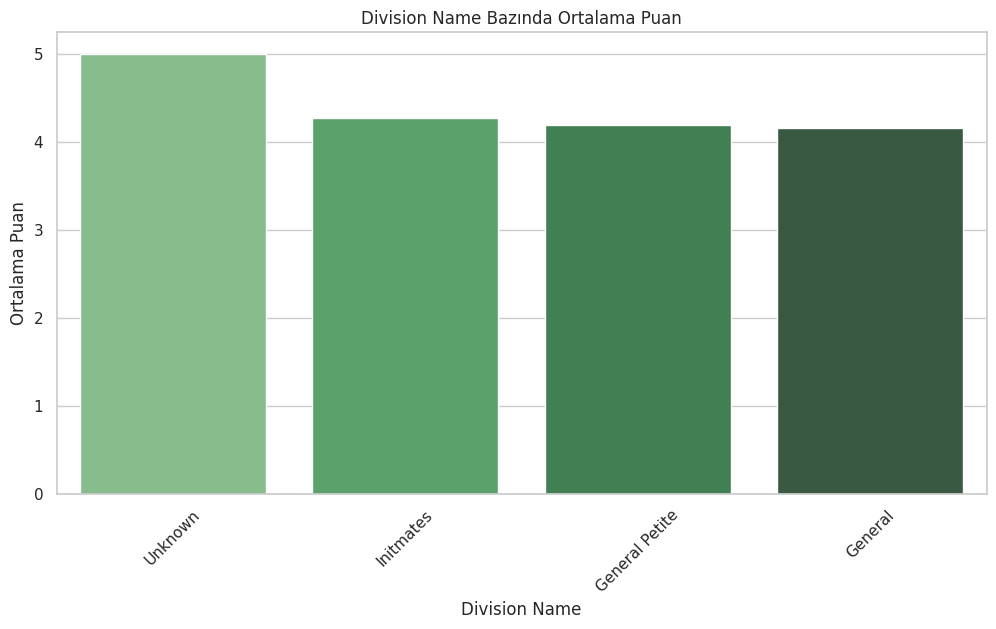

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Division Name bazında tavsiye oranı
plt.figure(figsize=(12,6))
sns.barplot(
    data=division_stats.sort_values('recommend_rate', ascending=False),
    x='Division Name', y='recommend_rate',
    hue='Division Name', palette='Blues_d', legend=False
)
plt.title('Division Name Bazında Tavsiye Oranı')
plt.ylabel('Tavsiye Oranı (Ortalama Recommended IND)')
plt.xlabel('Division Name')
plt.xticks(rotation=45)
plt.show()

# Division Name bazında ortalama puan
plt.figure(figsize=(12,6))
sns.barplot(
    data=division_stats.sort_values('avg_rating', ascending=False),
    x='Division Name', y='avg_rating',
    hue='Division Name', palette='Greens_d', legend=False
)
plt.title('Division Name Bazında Ortalama Puan')
plt.ylabel('Ortalama Puan')
plt.xlabel('Division Name')
plt.xticks(rotation=45)
plt.show()



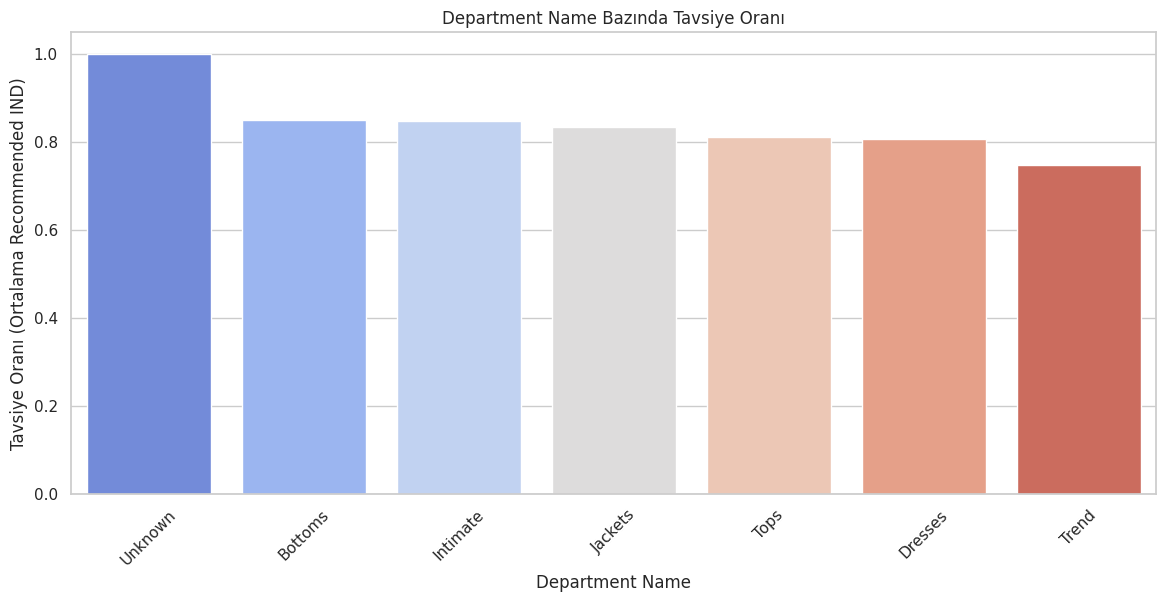

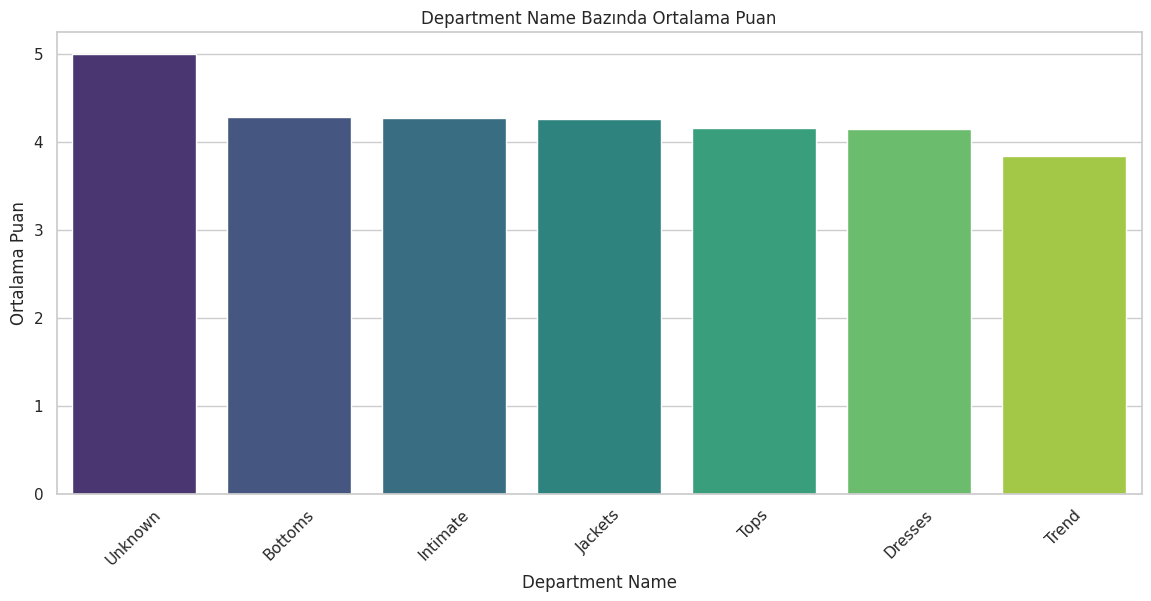

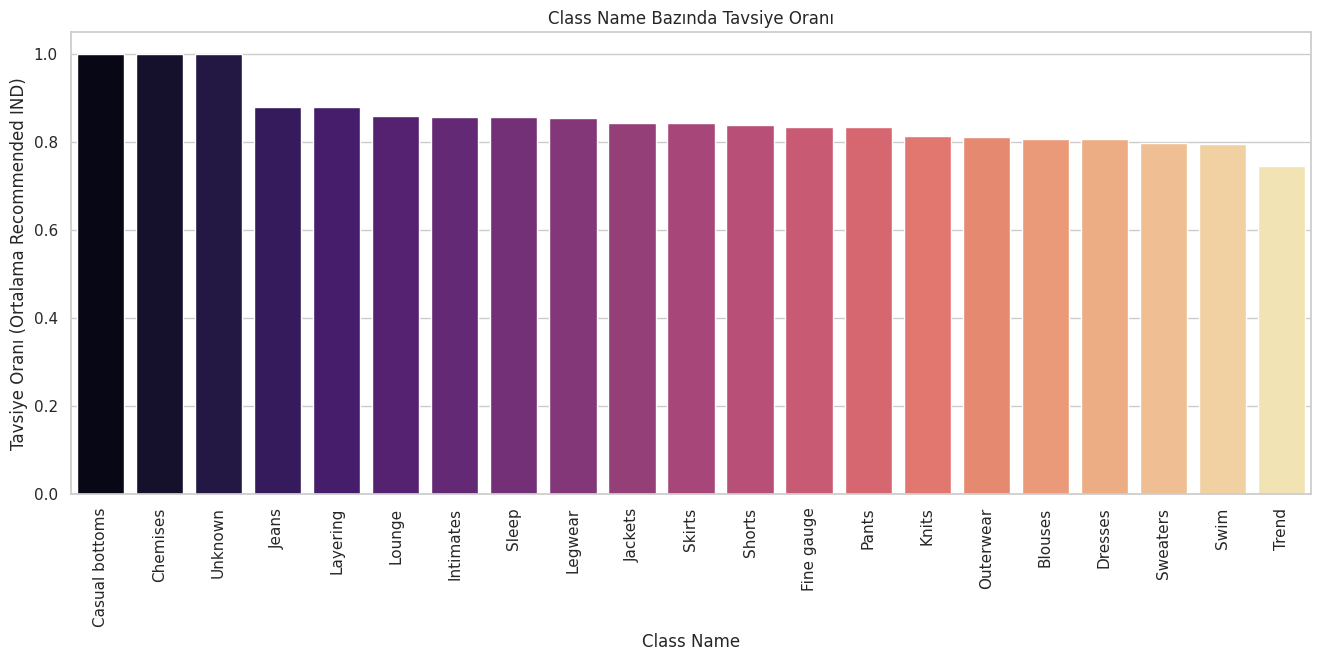

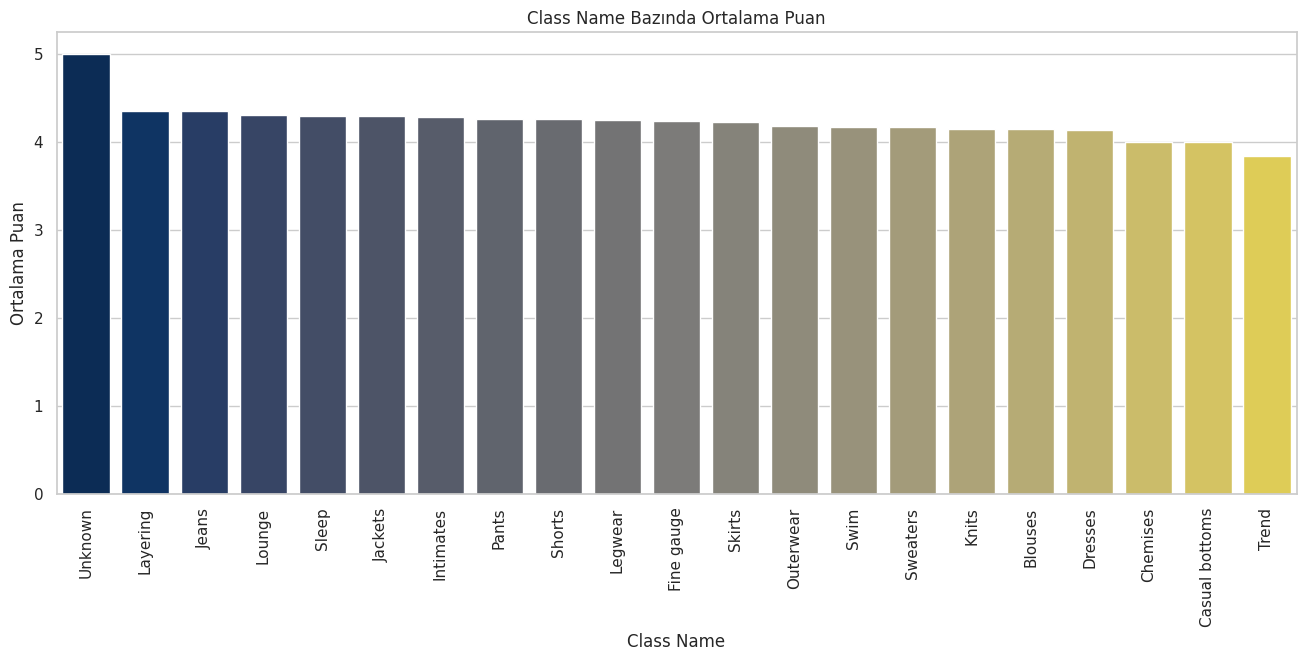

In [ ]:
# Department Name bazında tavsiye oranı
plt.figure(figsize=(14,6))
sns.barplot(
    data=department_stats.sort_values('recommend_rate', ascending=False),
    x='Department Name', y='recommend_rate',
    hue='Department Name', palette='coolwarm', legend=False
)
plt.title('Department Name Bazında Tavsiye Oranı')
plt.ylabel('Tavsiye Oranı (Ortalama Recommended IND)')
plt.xlabel('Department Name')
plt.xticks(rotation=45)
plt.show()

# Department Name bazında ortalama puan
plt.figure(figsize=(14,6))
sns.barplot(
    data=department_stats.sort_values('avg_rating', ascending=False),
    x='Department Name', y='avg_rating',
    hue='Department Name', palette='viridis', legend=False
)
plt.title('Department Name Bazında Ortalama Puan')
plt.ylabel('Ortalama Puan')
plt.xlabel('Department Name')
plt.xticks(rotation=45)
plt.show()

# Class Name bazında tavsiye oranı
plt.figure(figsize=(16,6))
sns.barplot(
    data=class_stats.sort_values('recommend_rate', ascending=False),
    x='Class Name', y='recommend_rate',
    hue='Class Name', palette='magma', legend=False
)
plt.title('Class Name Bazında Tavsiye Oranı')
plt.ylabel('Tavsiye Oranı (Ortalama Recommended IND)')
plt.xlabel('Class Name')
plt.xticks(rotation=90)
plt.show()

# Class Name bazında ortalama puan
plt.figure(figsize=(16,6))
sns.barplot(
    data=class_stats.sort_values('avg_rating', ascending=False),
    x='Class Name', y='avg_rating',
    hue='Class Name', palette='cividis', legend=False
)
plt.title('Class Name Bazında Ortalama Puan')
plt.ylabel('Ortalama Puan')
plt.xlabel('Class Name')
plt.xticks(rotation=90)
plt.show()


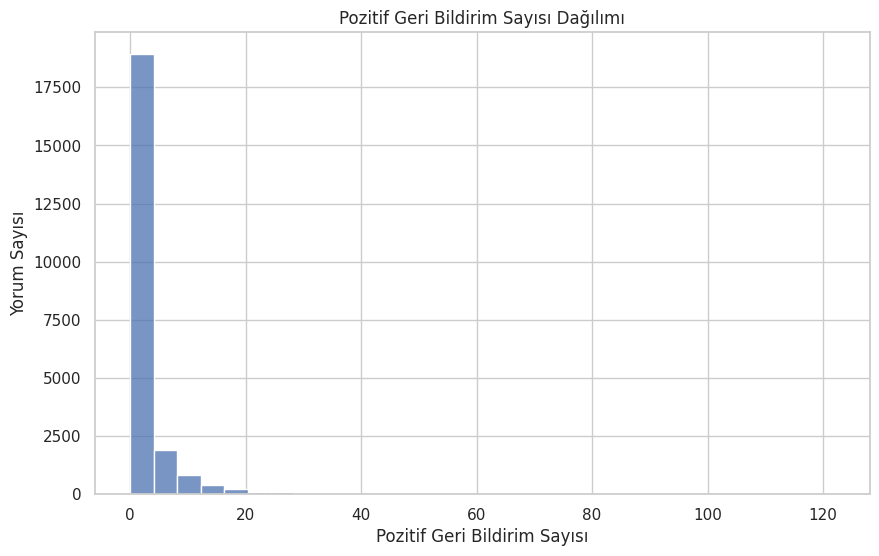

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(df['Positive Feedback Count'], bins=30, kde=False)
plt.title('Pozitif Geri Bildirim Sayısı Dağılımı')
plt.xlabel('Pozitif Geri Bildirim Sayısı')
plt.ylabel('Yorum Sayısı')
plt.show()


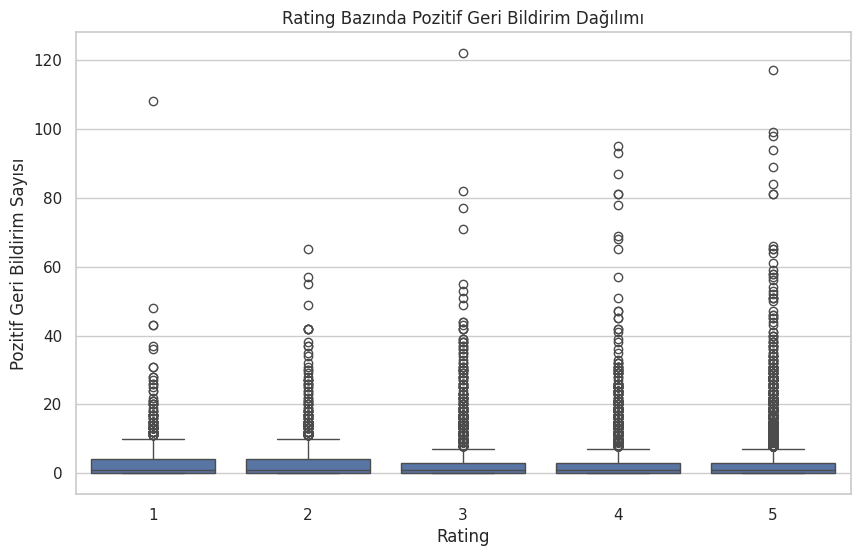

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Rating', y='Positive Feedback Count', data=df)
plt.title('Rating Bazında Pozitif Geri Bildirim Dağılımı')
plt.xlabel('Rating')
plt.ylabel('Pozitif Geri Bildirim Sayısı')
plt.show()


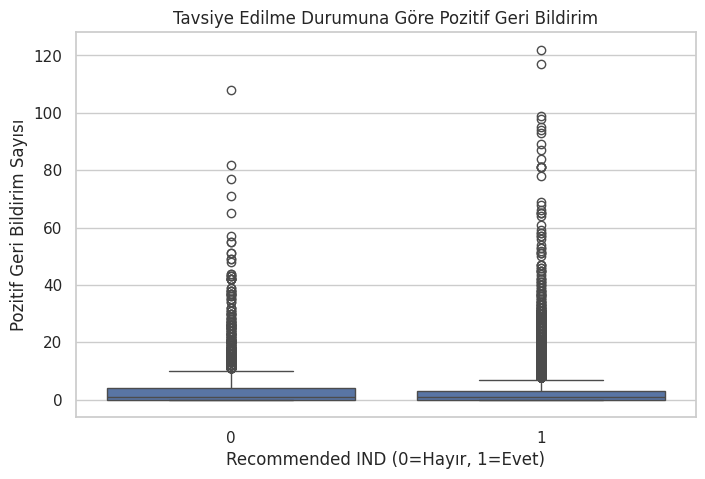

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Recommended IND', y='Positive Feedback Count', data=df)
plt.title('Tavsiye Edilme Durumuna Göre Pozitif Geri Bildirim')
plt.xlabel('Recommended IND (0=Hayır, 1=Evet)')
plt.ylabel('Pozitif Geri Bildirim Sayısı')
plt.show()


In [ ]:
print("Pozitif Geri Bildirim Sayısı - Temel İstatistikler:")
print(df['Positive Feedback Count'].describe())

print("\nRating'e göre ortalama pozitif geri bildirim sayısı:")
print(df.groupby('Rating')['Positive Feedback Count'].mean())

print("\nRecommended IND'e göre ortalama pozitif geri bildirim sayısı:")
print(df.groupby('Recommended IND')['Positive Feedback Count'].mean())


Pozitif Geri Bildirim Sayısı - Temel İstatistikler:
count    22641.000000
mean         2.630582
std          5.786164
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max        122.000000
Name: Positive Feedback Count, dtype: float64

Rating'e göre ortalama pozitif geri bildirim sayısı:
Rating
1    3.548112
2    3.360232
3    3.198725
4    2.488386
5    2.408134
Name: Positive Feedback Count, dtype: float64

Recommended IND'e göre ortalama pozitif geri bildirim sayısı:
Recommended IND
0    3.441600
1    2.451187
Name: Positive Feedback Count, dtype: float64


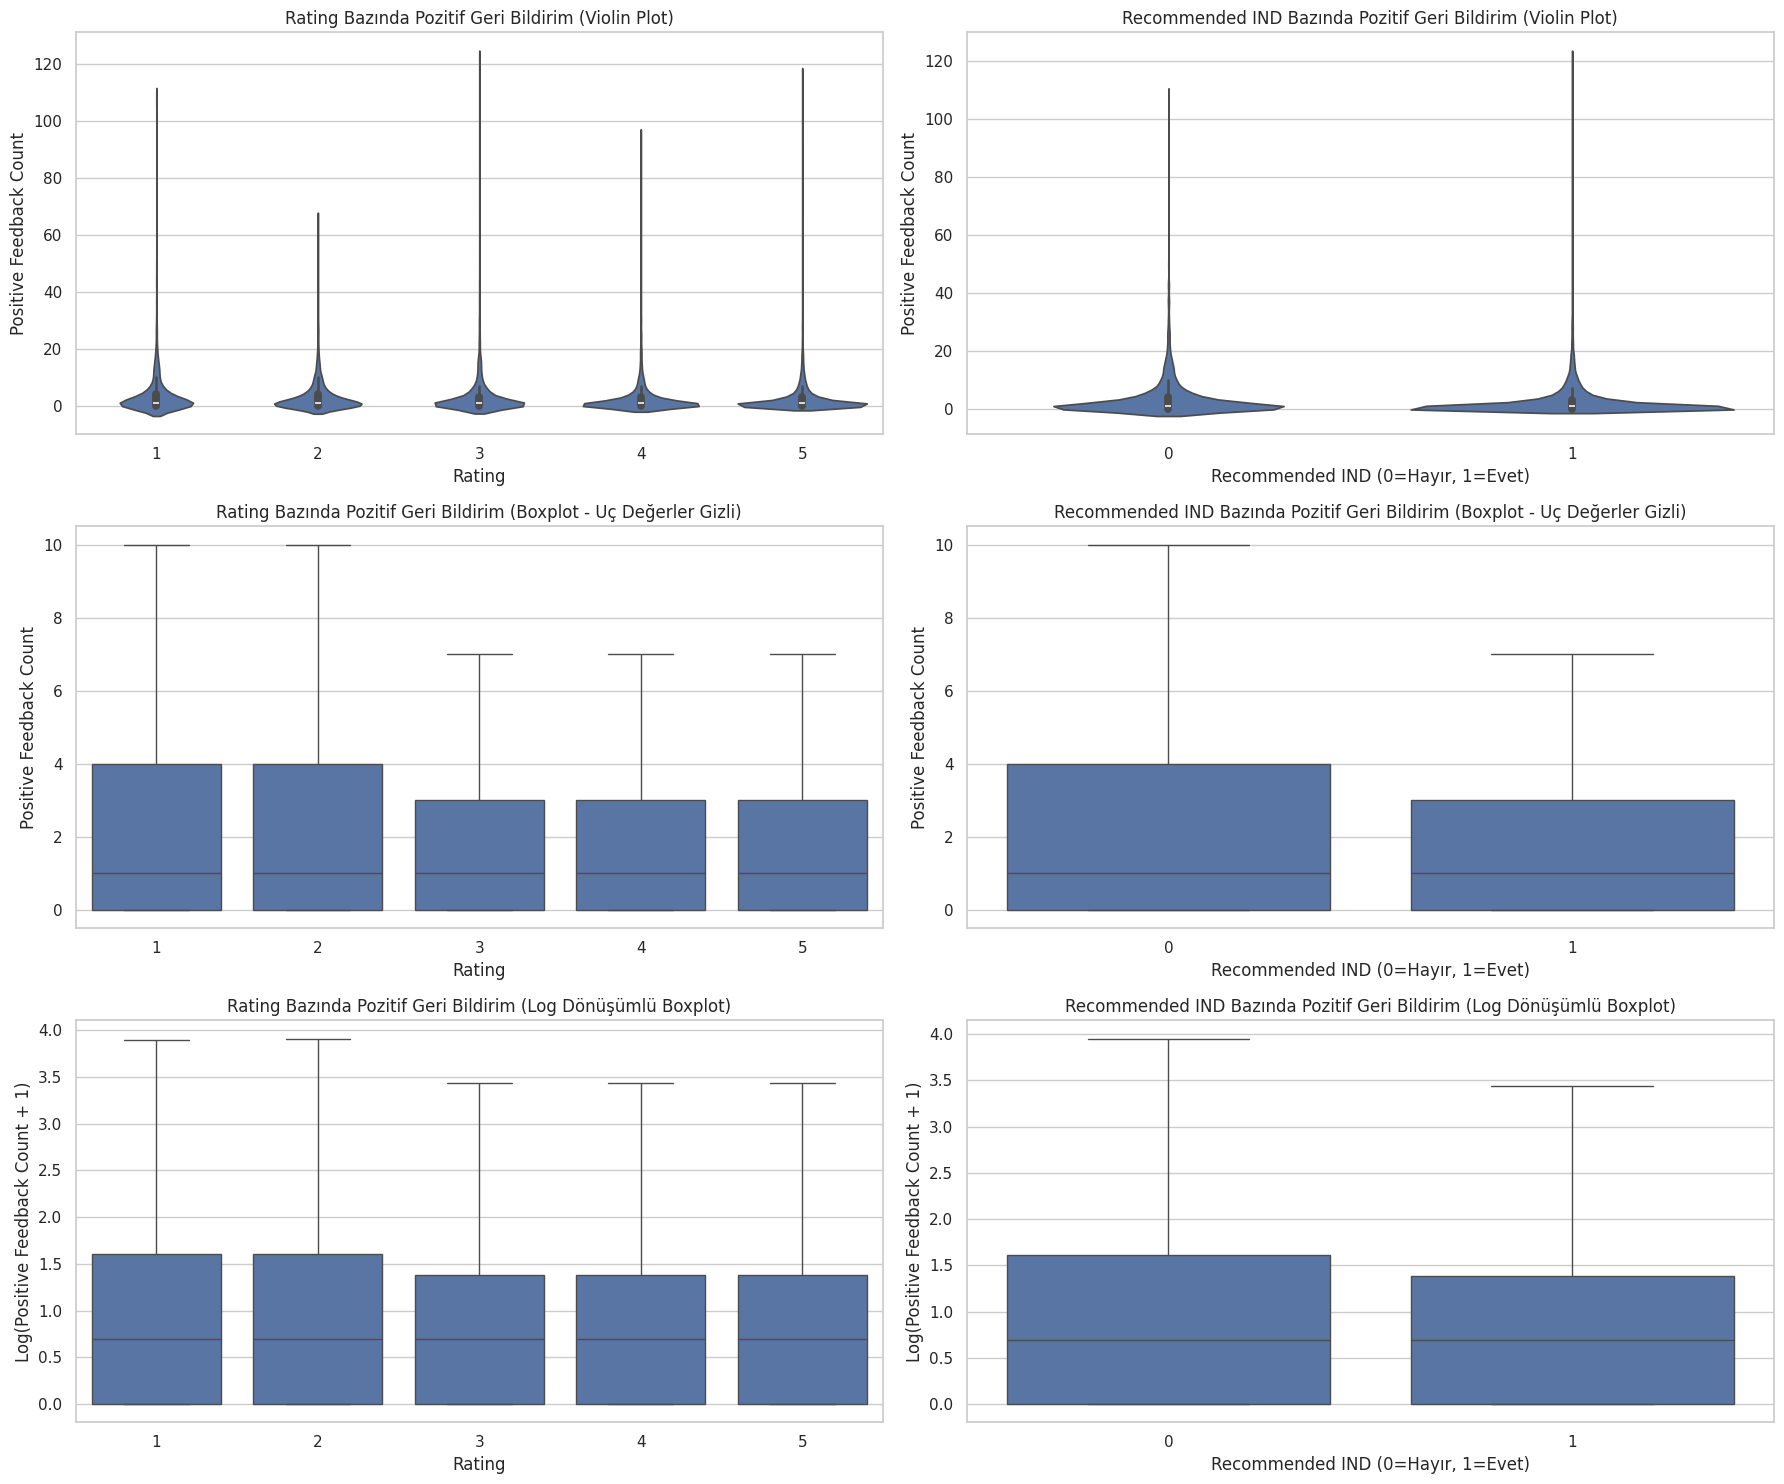

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(18, 15))

# 2. Pozitif Geri Bildirim vs Rating

# Violin Plot
plt.subplot(3, 2, 1)
sns.violinplot(x='Rating', y='Positive Feedback Count', data=df)
plt.title('Rating Bazında Pozitif Geri Bildirim (Violin Plot)')
plt.xlabel('Rating')
plt.ylabel('Positive Feedback Count')

# Boxplot (Uç Değerler Gizli)
plt.subplot(3, 2, 3)
sns.boxplot(x='Rating', y='Positive Feedback Count', data=df, showfliers=False)
plt.title('Rating Bazında Pozitif Geri Bildirim (Boxplot - Uç Değerler Gizli)')
plt.xlabel('Rating')
plt.ylabel('Positive Feedback Count')

# Log Dönüşümlü Boxplot (Uç Değerler Gizli)
plt.subplot(3, 2, 5)
sns.boxplot(x='Rating', y=np.log1p(df['Positive Feedback Count']), data=df, showfliers=False)
plt.title('Rating Bazında Pozitif Geri Bildirim (Log Dönüşümlü Boxplot)')
plt.xlabel('Rating')
plt.ylabel('Log(Positive Feedback Count + 1)')

# 3. Pozitif Geri Bildirim vs Recommended IND

# Violin Plot
plt.subplot(3, 2, 2)
sns.violinplot(x='Recommended IND', y='Positive Feedback Count', data=df)
plt.title('Recommended IND Bazında Pozitif Geri Bildirim (Violin Plot)')
plt.xlabel('Recommended IND (0=Hayır, 1=Evet)')
plt.ylabel('Positive Feedback Count')

# Boxplot (Uç Değerler Gizli)
plt.subplot(3, 2, 4)
sns.boxplot(x='Recommended IND', y='Positive Feedback Count', data=df, showfliers=False)
plt.title('Recommended IND Bazında Pozitif Geri Bildirim (Boxplot - Uç Değerler Gizli)')
plt.xlabel('Recommended IND (0=Hayır, 1=Evet)')
plt.ylabel('Positive Feedback Count')

# Log Dönüşümlü Boxplot (Uç Değerler Gizli)
plt.subplot(3, 2, 6)
sns.boxplot(x='Recommended IND', y=np.log1p(df['Positive Feedback Count']), data=df, showfliers=False)
plt.title('Recommended IND Bazında Pozitif Geri Bildirim (Log Dönüşümlü Boxplot)')
plt.xlabel('Recommended IND (0=Hayır, 1=Evet)')
plt.ylabel('Log(Positive Feedback Count + 1)')

plt.tight_layout()
plt.show()



In [ ]:
import pandas as pd

# Örnek veri çerçevesi df olarak varsayıyoruz.

# 1. Eksik metin verisi olan satırları kaldırmak (Review Text ve Title için)
df_cleaned = df.dropna(subset=['Review Text', 'Title'])

# Eğer boş string (“”) olanlar da varsa, onları da temizleyelim
df_cleaned = df_cleaned[(df_cleaned['Review Text'].str.strip() != '') & (df_cleaned['Title'].str.strip() != '')]

# 2. Kategori sütunlarındaki eksikleri "Unknown" ile doldurmak
for col in ['Division Name', 'Department Name', 'Class Name']:
    df_cleaned[col] = df_cleaned[col].fillna('Unknown')
    df_cleaned[col] = df_cleaned[col].replace('', 'Unknown')

# 3. Alternatif olarak, metin alanları için boş olanları doldurmak (örneğin 'No Review')
df_filled = df.copy()
df_filled['Review Text'] = df_filled['Review Text'].fillna('No Review').replace('', 'No Review')
df_filled['Title'] = df_filled['Title'].fillna('No Title').replace('', 'No Title')

# 4. Eksik verileri işaretlemek için yeni sütun eklemek (opsiyonel)
df['ReviewText_missing'] = df['Review Text'].isna() | (df['Review Text'].str.strip() == '')
df['Title_missing'] = df['Title'].isna() | (df['Title'].str.strip() == '')

# Sonrasında, bu sütunları modelde ya da analizde kullanabilirsiniz.

# Son hali görmek için
print(df_cleaned.info())
print(df_filled.info())


<class 'pandas.core.frame.DataFrame'>
Index: 22641 entries, 0 to 23485
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Clothing ID              22641 non-null  int64   
 1   Age                      22641 non-null  int64   
 2   Title                    22641 non-null  object  
 3   Review Text              22641 non-null  object  
 4   Rating                   22641 non-null  int64   
 5   Recommended IND          22641 non-null  int64   
 6   Positive Feedback Count  22641 non-null  int64   
 7   Division Name            22641 non-null  object  
 8   Department Name          22641 non-null  object  
 9   Class Name               22641 non-null  object  
 10  Cleaned_Review_Text      22641 non-null  object  
 11  Cleaned_Title            22641 non-null  object  
 12  review_length            22641 non-null  int64   
 13  review_word_count        22641 non-null  int64   
 14  cleaned_rev

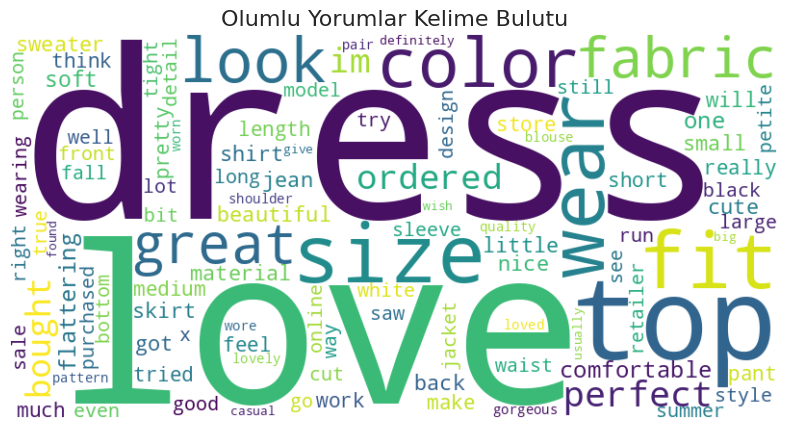

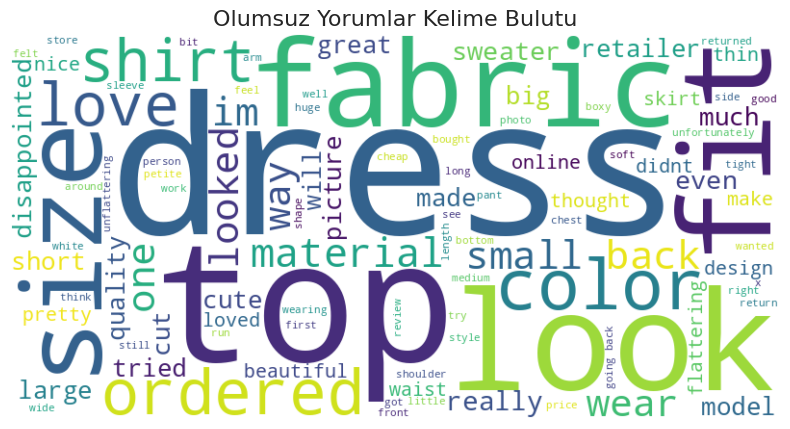

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd

# Örnek dataframe adı: df
# Rating 4 ve 5 => olumlu yorumlar, 1 ve 2 => olumsuz yorumlar (3 tarafsız olabilir, istersen dahil etme)

# Olumlu yorumlar
positive_reviews = df[df['Rating'] >= 4]['Cleaned_Review_Text'].str.cat(sep=' ')

# Olumsuz yorumlar
negative_reviews = df[df['Rating'] <= 2]['Cleaned_Review_Text'].str.cat(sep=' ')

# Kelime bulutu oluşturma fonksiyonu
def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()

# Olumlu kelime bulutu
plot_wordcloud(positive_reviews, 'Olumlu Yorumlar Kelime Bulutu')

# Olumsuz kelime bulutu
plot_wordcloud(negative_reviews, 'Olumsuz Yorumlar Kelime Bulutu')


<ipython-input-148-5ccf91d4f09a>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_rating = df.groupby('Age_Group')['Rating'].mean().reset_index()
<ipython-input-148-5ccf91d4f09a>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age_Group', y='Rating', data=age_rating, palette='viridis')


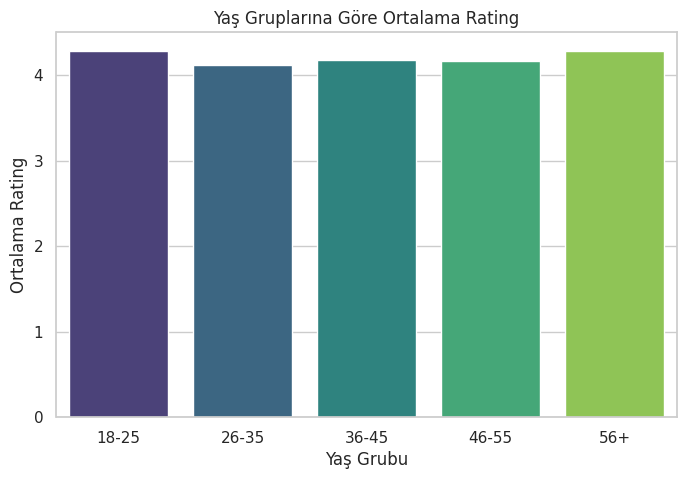

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Yaş gruplarını tanımla (örnek: 18-25, 26-35, 36-45, 46-55, 56+)
bins = [17, 25, 35, 45, 55, 100]
labels = ['18-25', '26-35', '36-45', '46-55', '56+']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Yaş grubuna göre ortalama puan
age_rating = df.groupby('Age_Group')['Rating'].mean().reset_index()

# Grafik
plt.figure(figsize=(8,5))
sns.barplot(x='Age_Group', y='Rating', data=age_rating, palette='viridis')
plt.title('Yaş Gruplarına Göre Ortalama Rating')
plt.xlabel('Yaş Grubu')
plt.ylabel('Ortalama Rating')
plt.show()



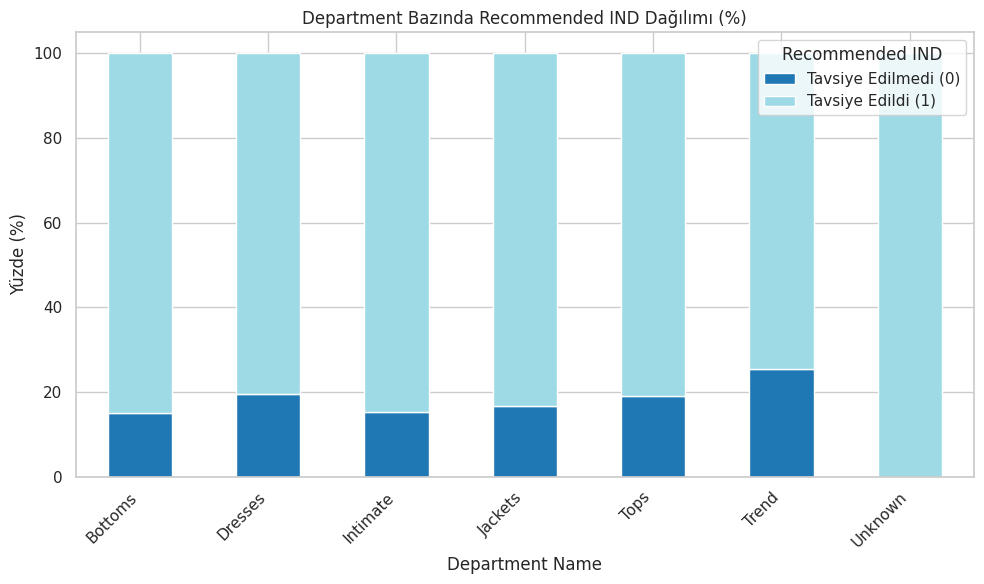

In [ ]:
import matplotlib.pyplot as plt

# Department ve Recommended IND'e göre sayım
dept_recom = df.groupby(['Department Name', 'Recommended IND']).size().unstack(fill_value=0)

# Her department için toplam sayıyı bul
dept_totals = dept_recom.sum(axis=1)

# Yüzdelik olarak hesapla
dept_recom_percent = dept_recom.div(dept_totals, axis=0) * 100

# Grafik çizimi
dept_recom_percent.plot(kind='bar', stacked=True, figsize=(10,6), colormap='tab20')

plt.title('Department Bazında Recommended IND Dağılımı (%)')
plt.xlabel('Department Name')
plt.ylabel('Yüzde (%)')
plt.legend(title='Recommended IND', labels=['Tavsiye Edilmedi (0)', 'Tavsiye Edildi (1)'])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


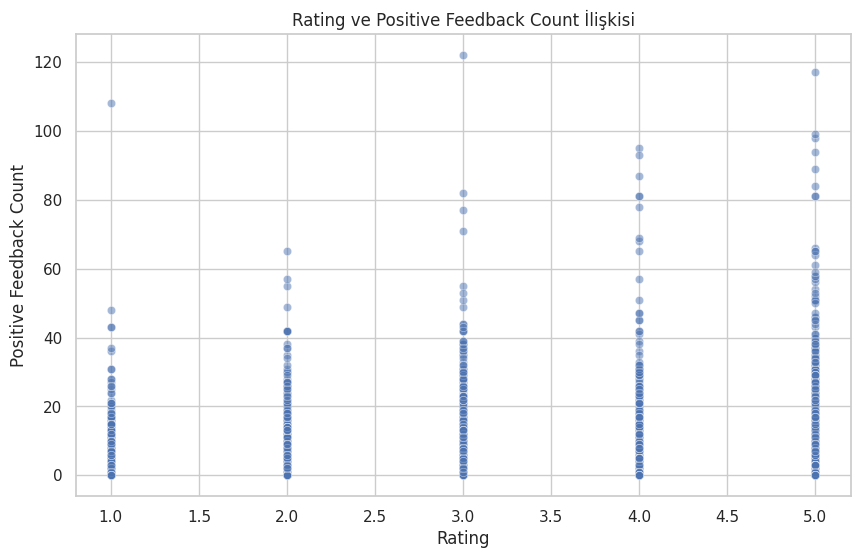

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Rating', y='Positive Feedback Count', data=df, alpha=0.5)
plt.title('Rating ve Positive Feedback Count İlişkisi')
plt.xlabel('Rating')
plt.ylabel('Positive Feedback Count')
plt.show()



<ipython-input-151-2847ffc6fa51>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Department Name', y='Recommended IND', data=dept_recommend, palette='coolwarm')


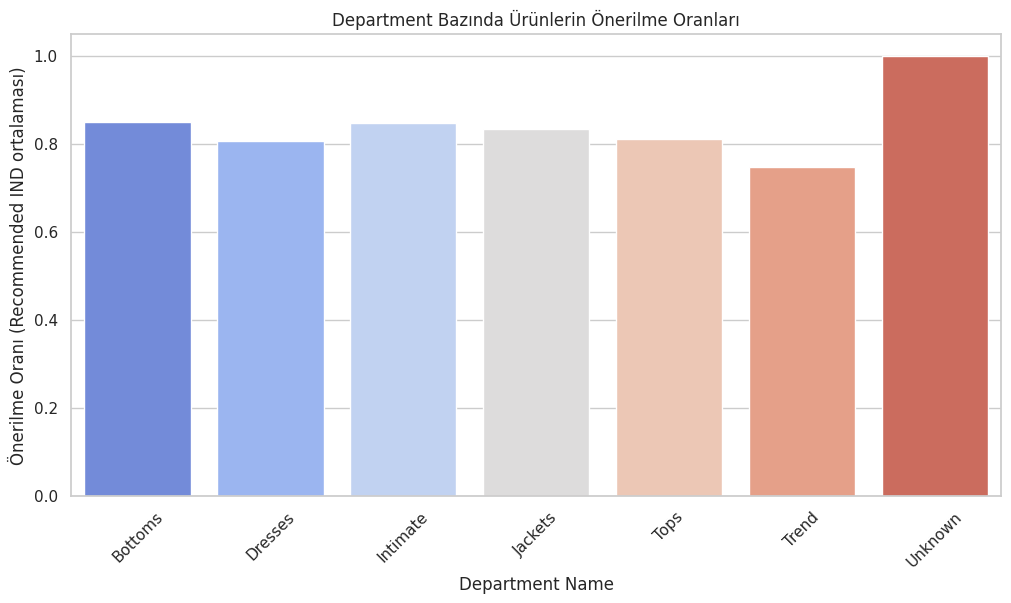

In [ ]:
# Department bazında Recommended IND ortalaması (yani önerilme oranı)
dept_recommend = df.groupby('Department Name')['Recommended IND'].mean().reset_index()

# Barplot çizimi
plt.figure(figsize=(12,6))
sns.barplot(x='Department Name', y='Recommended IND', data=dept_recommend, palette='coolwarm')
plt.title('Department Bazında Ürünlerin Önerilme Oranları')
plt.ylabel('Önerilme Oranı (Recommended IND ortalaması)')
plt.xlabel('Department Name')
plt.xticks(rotation=45)
plt.show()


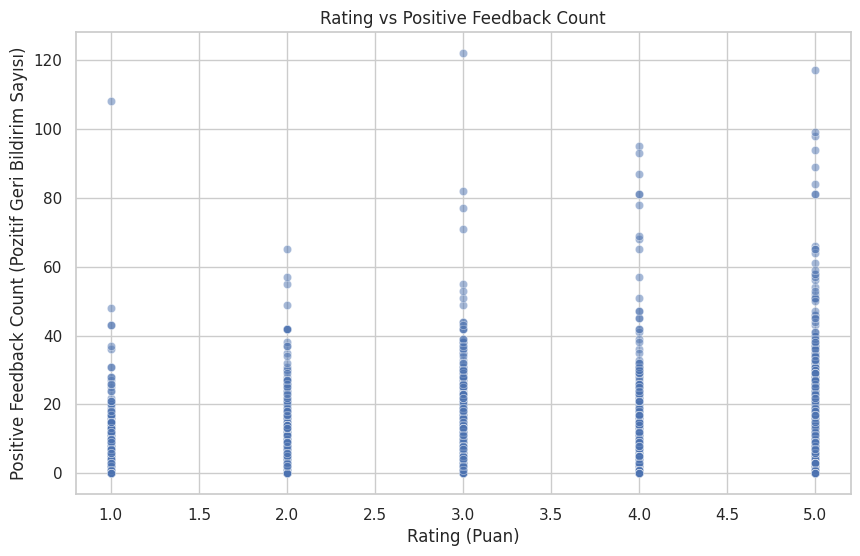

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Rating', y='Positive Feedback Count', data=df, alpha=0.5)
plt.title('Rating vs Positive Feedback Count')
plt.xlabel('Rating (Puan)')
plt.ylabel('Positive Feedback Count (Pozitif Geri Bildirim Sayısı)')
plt.show()


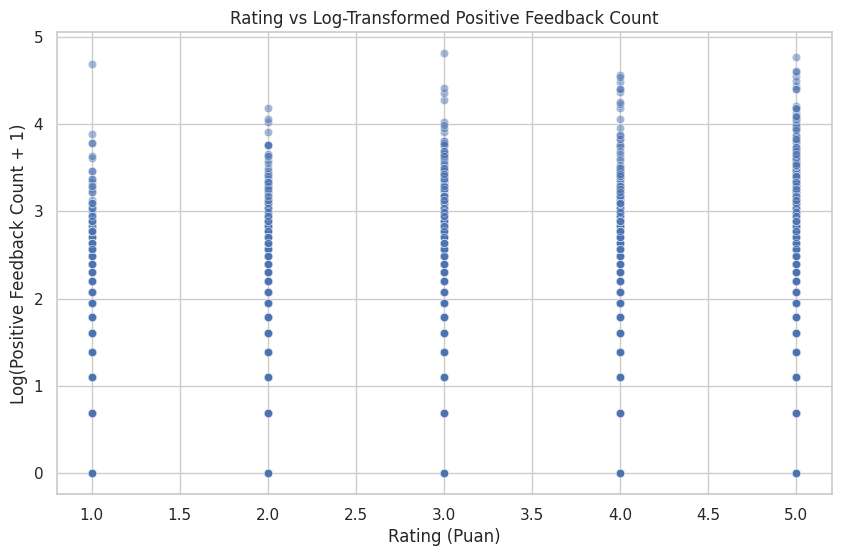

In [ ]:
import numpy as np

df['log_Positive_Feedback'] = np.log1p(df['Positive Feedback Count'])

plt.figure(figsize=(10,6))
sns.scatterplot(x='Rating', y='log_Positive_Feedback', data=df, alpha=0.5)
plt.title('Rating vs Log-Transformed Positive Feedback Count')
plt.xlabel('Rating (Puan)')
plt.ylabel('Log(Positive Feedback Count + 1)')
plt.show()


In [ ]:
missing_counts = df.isnull().sum()
missing_ratios = missing_counts / len(df) * 100
missing_summary = pd.DataFrame({'Missing Count': missing_counts, 'Missing Ratio (%)': missing_ratios})
print(missing_summary[missing_summary['Missing Count'] > 0])


Empty DataFrame
Columns: [Missing Count, Missing Ratio (%)]
Index: []


<ipython-input-155-fef77e9b3563>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_rating = df.groupby('Age_Group')['Rating'].mean().reset_index()
<ipython-input-155-fef77e9b3563>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_recommend = df.groupby('Age_Group')['Recommended IND'].mean().reset_index()
<ipython-input-155-fef77e9b3563>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age_Group', y='Rating', data=age_rating, palette='viridis')
<ipytho

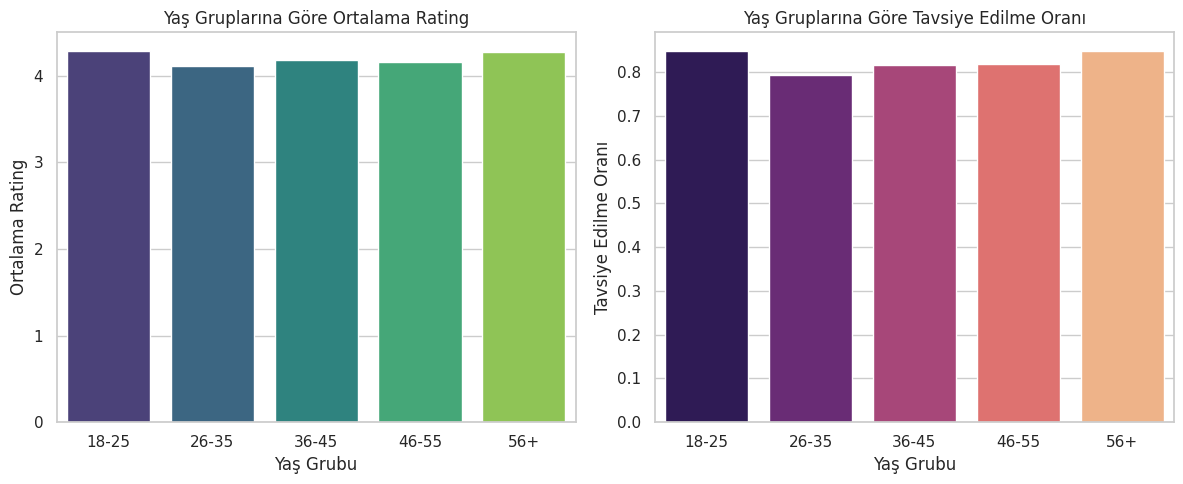

In [ ]:
# Yaş gruplarına göre ortalama puan
age_rating = df.groupby('Age_Group')['Rating'].mean().reset_index()

# Yaş gruplarına göre tavsiye edilme oranı
age_recommend = df.groupby('Age_Group')['Recommended IND'].mean().reset_index()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.barplot(x='Age_Group', y='Rating', data=age_rating, palette='viridis')
plt.title('Yaş Gruplarına Göre Ortalama Rating')
plt.ylabel('Ortalama Rating')
plt.xlabel('Yaş Grubu')

plt.subplot(1,2,2)
sns.barplot(x='Age_Group', y='Recommended IND', data=age_recommend, palette='magma')
plt.title('Yaş Gruplarına Göre Tavsiye Edilme Oranı')
plt.ylabel('Tavsiye Edilme Oranı')
plt.xlabel('Yaş Grubu')

plt.tight_layout()
plt.show()


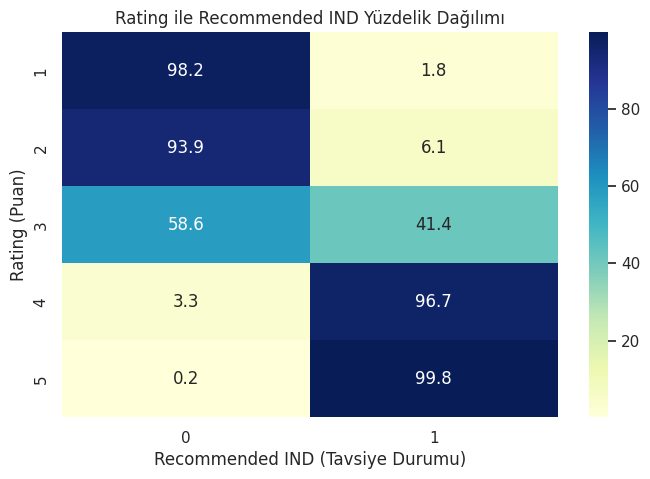

In [ ]:
# Çapraz tablo oluştur
rating_recommend_crosstab = pd.crosstab(df['Rating'], df['Recommended IND'], normalize='index') * 100

# Heatmap ile görselleştir
plt.figure(figsize=(8,5))
sns.heatmap(rating_recommend_crosstab, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title('Rating ile Recommended IND Yüzdelik Dağılımı')
plt.ylabel('Rating (Puan)')
plt.xlabel('Recommended IND (Tavsiye Durumu)')
plt.show()


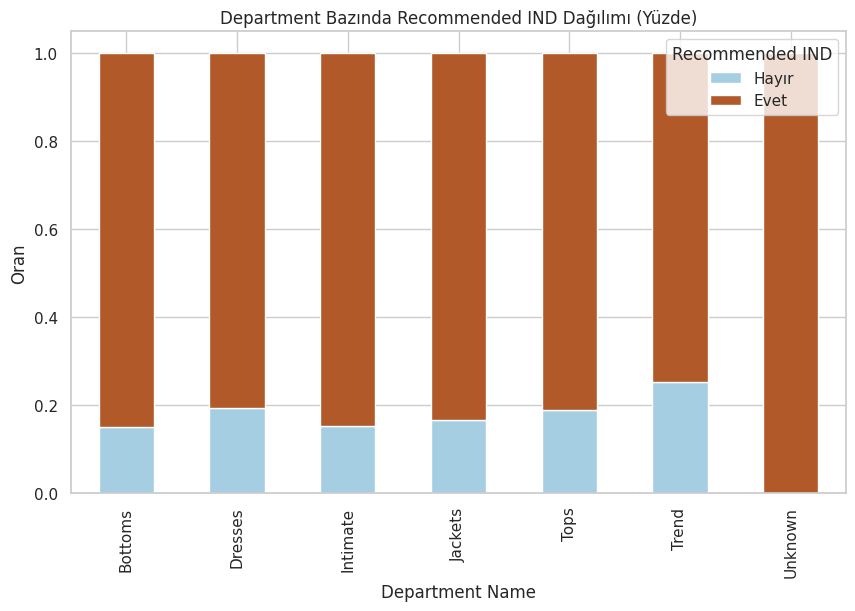

In [ ]:
# Department ve Recommended IND bazında sayılar
dept_recommend_counts = df.groupby(['Department Name', 'Recommended IND']).size().unstack(fill_value=0)

# Her departman için yüzdelik hesapla
dept_recommend_ratio = dept_recommend_counts.div(dept_recommend_counts.sum(axis=1), axis=0)

# Grafik çizimi
dept_recommend_ratio.plot(kind='bar', stacked=True, figsize=(10,6), colormap='Paired')
plt.title('Department Bazında Recommended IND Dağılımı (Yüzde)')
plt.ylabel('Oran')
plt.xlabel('Department Name')
plt.legend(title='Recommended IND', labels=['Hayır', 'Evet'])
plt.show()


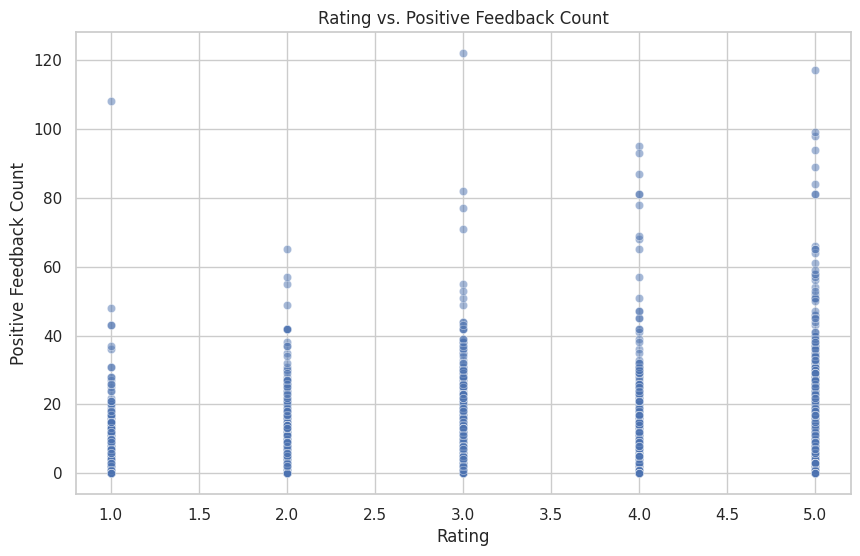

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Rating', y='Positive Feedback Count', alpha=0.5)
plt.title('Rating vs. Positive Feedback Count')
plt.xlabel('Rating')
plt.ylabel('Positive Feedback Count')
plt.show()


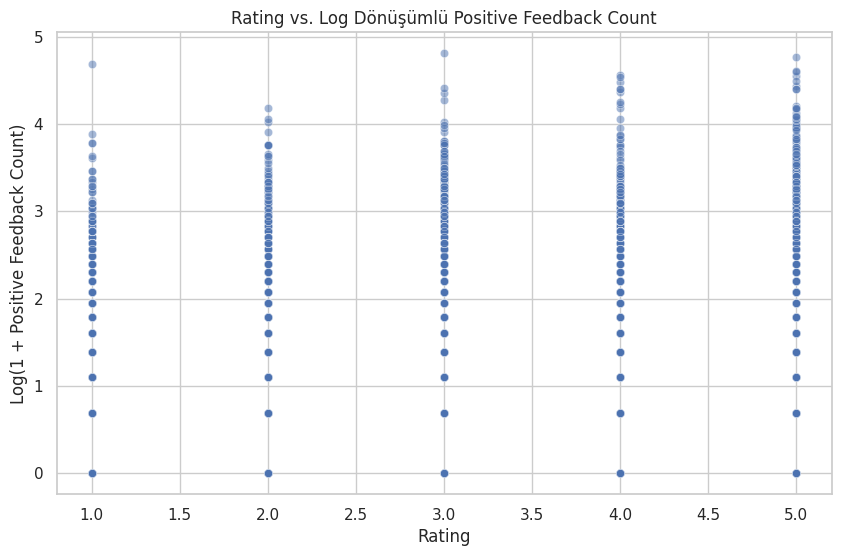

In [ ]:
import numpy as np

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Rating', y=np.log1p(df['Positive Feedback Count']), alpha=0.5)
plt.title('Rating vs. Log Dönüşümlü Positive Feedback Count')
plt.xlabel('Rating')
plt.ylabel('Log(1 + Positive Feedback Count)')
plt.show()


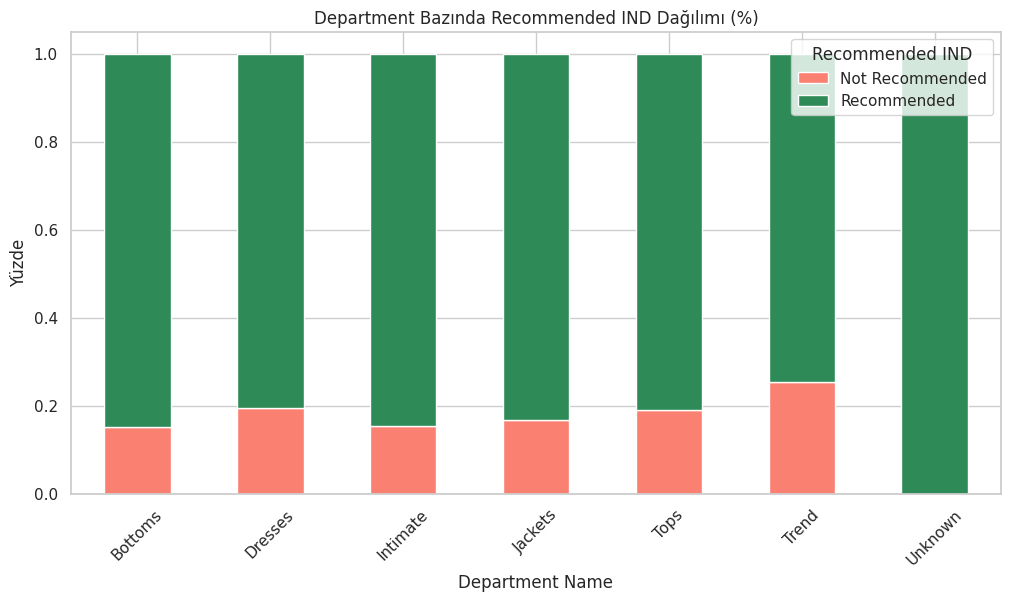

In [ ]:
# Department ve Recommended IND bazında sayıları hesapla
dept_recommend_counts = df.groupby(['Department Name', 'Recommended IND']).size().unstack(fill_value=0)

# Yüzdeleri hesapla
dept_recommend_percent = dept_recommend_counts.div(dept_recommend_counts.sum(axis=1), axis=0)

# Grafiği çiz
dept_recommend_percent.plot(kind='bar', stacked=True, figsize=(12,6),
                           color=['salmon', 'seagreen'])
plt.title('Department Bazında Recommended IND Dağılımı (%)')
plt.ylabel('Yüzde')
plt.xlabel('Department Name')
plt.legend(['Not Recommended', 'Recommended'], title='Recommended IND')
plt.xticks(rotation=45)
plt.show()


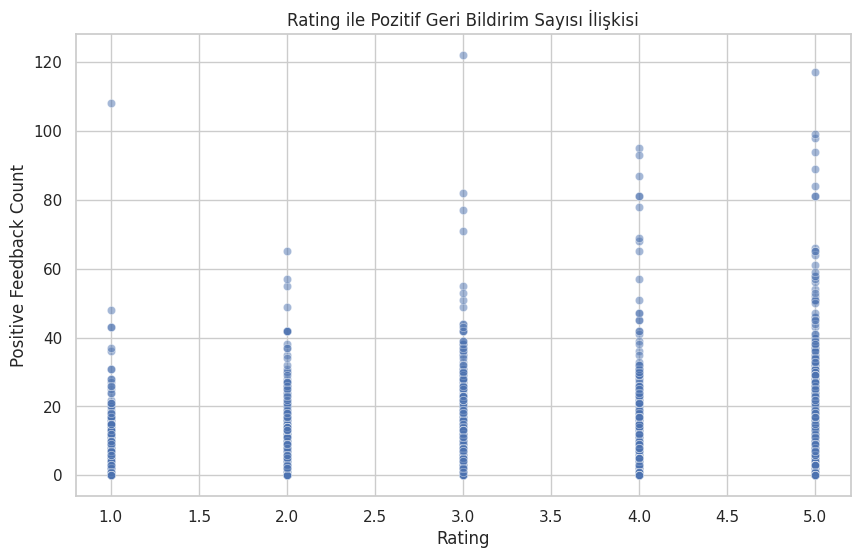

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Rating', y='Positive Feedback Count', alpha=0.5)
plt.title('Rating ile Pozitif Geri Bildirim Sayısı İlişkisi')
plt.xlabel('Rating')
plt.ylabel('Positive Feedback Count')
plt.show()


In [ ]:
!pip install vaderSentiment


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# VADER nesnesi oluştur
analyzer = SentimentIntensityAnalyzer()

# Sentiment skorlarını hesapla
df['sentiment_scores'] = df['Cleaned_Review_Text'].apply(lambda x: analyzer.polarity_scores(x))

# Pozitif, negatif ve nötr skorları ayrı sütunlara ayır
df['sentiment_pos'] = df['sentiment_scores'].apply(lambda x: x['pos'])
df['sentiment_neg'] = df['sentiment_scores'].apply(lambda x: x['neg'])
df['sentiment_neu'] = df['sentiment_scores'].apply(lambda x: x['neu'])
df['sentiment_compound'] = df['sentiment_scores'].apply(lambda x: x['compound'])

# Compound score'a göre sınıflandırma (örnek eşikler)
def sentiment_label(compound):
    if compound >= 0.05:
        return 'Positive'
    elif compound <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_label'] = df['sentiment_compound'].apply(sentiment_label)


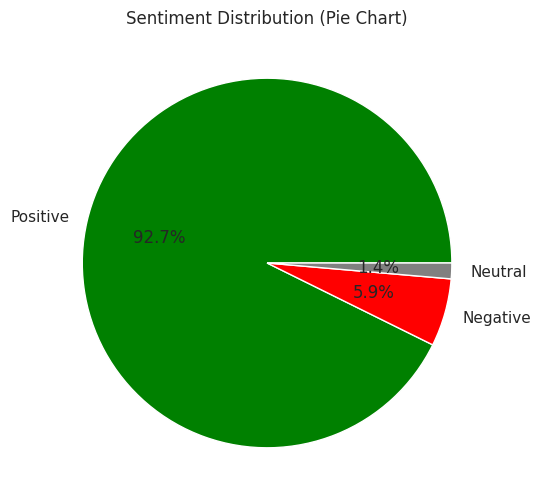

<ipython-input-164-55b7c41d2a9c>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment_label', data=df, palette=['green','red','gray'])


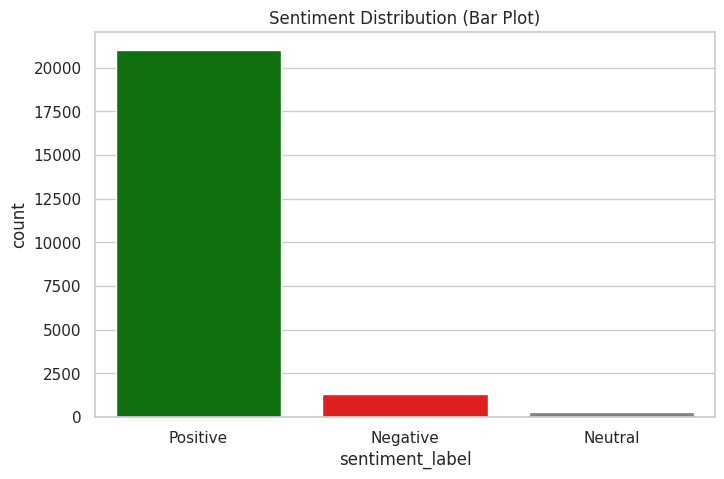

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pie Chart
sentiment_counts = df['sentiment_label'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=['green','red','gray'])
plt.title('Sentiment Distribution (Pie Chart)')
plt.show()

# Histogram (barplot)
plt.figure(figsize=(8,5))
sns.countplot(x='sentiment_label', data=df, palette=['green','red','gray'])
plt.title('Sentiment Distribution (Bar Plot)')
plt.show()


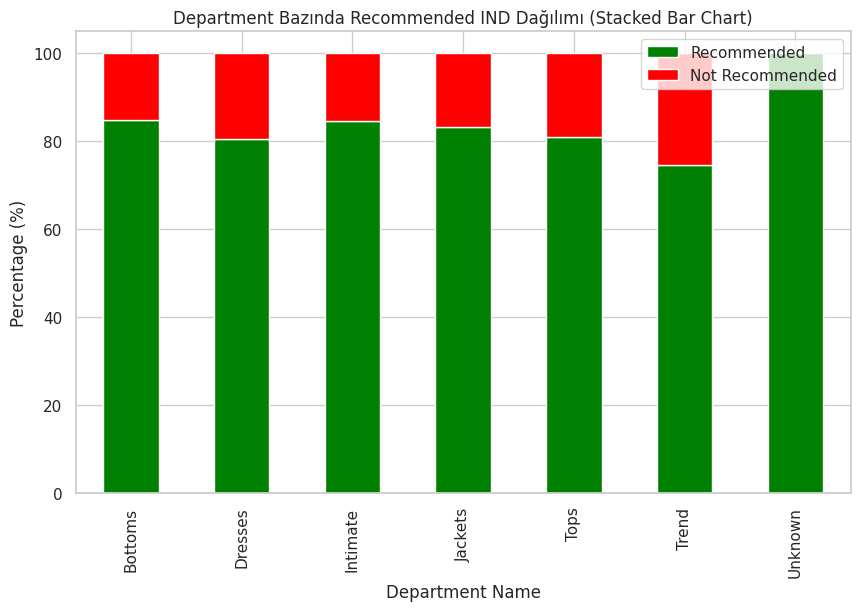

In [ ]:
# Department ve Recommended IND bazında sayılar
dept_recommend = df.groupby(['Department Name', 'Recommended IND']).size().unstack(fill_value=0)

# Toplam sayılar
dept_recommend['total'] = dept_recommend.sum(axis=1)

# Öneri yüzdeleri
dept_recommend['recommended_pct'] = dept_recommend[1] / dept_recommend['total'] * 100
dept_recommend['not_recommended_pct'] = dept_recommend[0] / dept_recommend['total'] * 100

# Görselleştirme
dept_recommend_pct = dept_recommend[['recommended_pct', 'not_recommended_pct']]

dept_recommend_pct.plot(kind='bar', stacked=True, figsize=(10,6), color=['green','red'])
plt.ylabel('Percentage (%)')
plt.title('Department Bazında Recommended IND Dağılımı (Stacked Bar Chart)')
plt.legend(['Recommended', 'Not Recommended'], loc='upper right')
plt.show()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


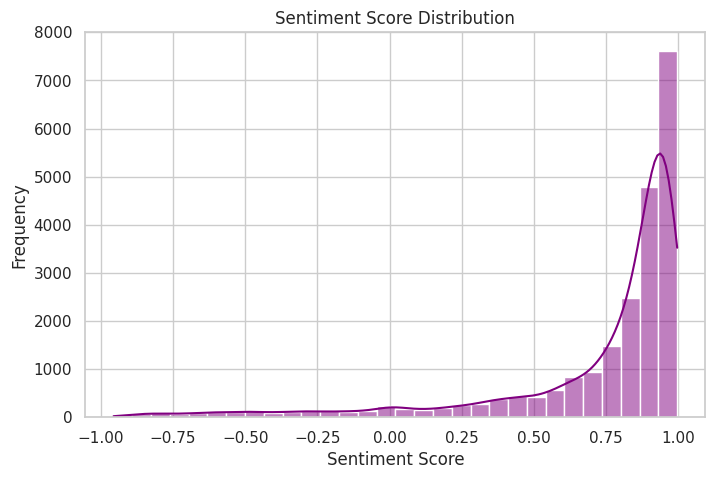

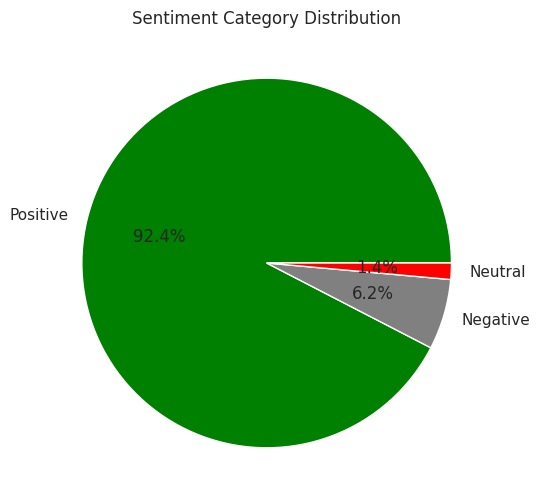

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

# Eğer nltk veri setleri indirilmediyse indir
nltk.download('vader_lexicon')

# VADER başlat
sia = SentimentIntensityAnalyzer()

# Her yoruma sentiment skoru ekle
df['sentiment_score'] = df['Cleaned_Review_Text'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Sentiment skoru kategorileri oluştur (pozitif, nötr, negatif)
def sentiment_category(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_category'] = df['sentiment_score'].apply(sentiment_category)

# Sentiment skorlarının dağılımını histogram ile göster
plt.figure(figsize=(8,5))
sns.histplot(df['sentiment_score'], bins=30, kde=True, color='purple')
plt.title('Sentiment Score Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

# Kategorik dağılımı pasta grafiği ile göster
plt.figure(figsize=(6,6))
df['sentiment_category'].value_counts().plot.pie(autopct='%1.1f%%', colors=['green', 'grey', 'red'])
plt.title('Sentiment Category Distribution')
plt.ylabel('')
plt.show()


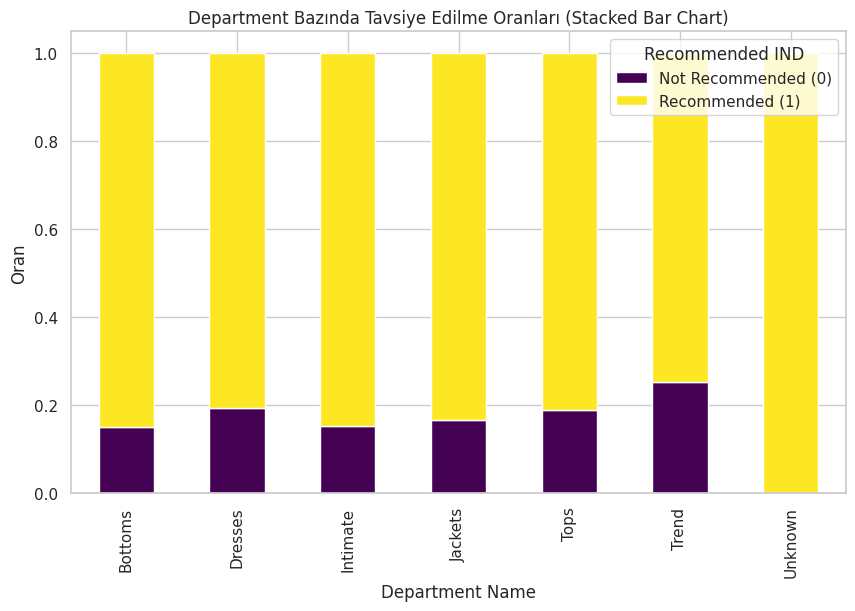

In [ ]:
# Department ve Recommended IND durumuna göre sayım
dept_recom = df.groupby(['Department Name', 'Recommended IND']).size().unstack(fill_value=0)

# Yüzdelik oranları hesapla
dept_recom_pct = dept_recom.div(dept_recom.sum(axis=1), axis=0)

# Görselleştirme
dept_recom_pct.plot(kind='bar', stacked=True, figsize=(10,6), colormap='viridis')

plt.title('Department Bazında Tavsiye Edilme Oranları (Stacked Bar Chart)')
plt.xlabel('Department Name')
plt.ylabel('Oran')
plt.legend(title='Recommended IND', labels=['Not Recommended (0)', 'Recommended (1)'], loc='upper right')
plt.show()


In [ ]:
df.to_excel("Women's Clothing Customer Reviews Analysis Part-1.xlsx", index=False)


In [ ]:
from textblob import TextBlob

# Duygu skorlarını hesaplayıp yeni bir sütuna ekle
df['sentiment_score'] = df['cleaned_review'].apply(lambda x: TextBlob(x).sentiment.polarity)


In [ ]:
def get_sentiment_label(score):
    if score > 0.1:
        return 'Positive'
    elif score < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_label'] = df['sentiment_score'].apply(get_sentiment_label)


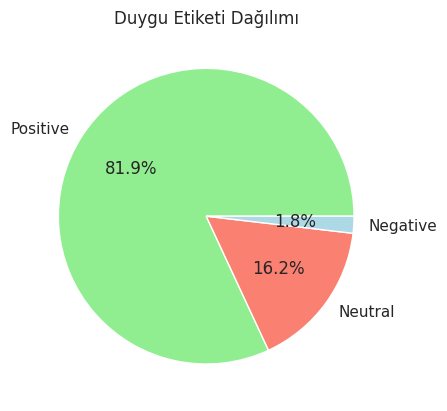

In [ ]:
import matplotlib.pyplot as plt

df['sentiment_label'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightgreen', 'salmon', 'lightblue'])
plt.title('Duygu Etiketi Dağılımı')
plt.ylabel('')
plt.show()



<ipython-input-171-04834cebd104>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment_label', data=df, order=['Positive', 'Neutral', 'Negative'], palette='pastel')


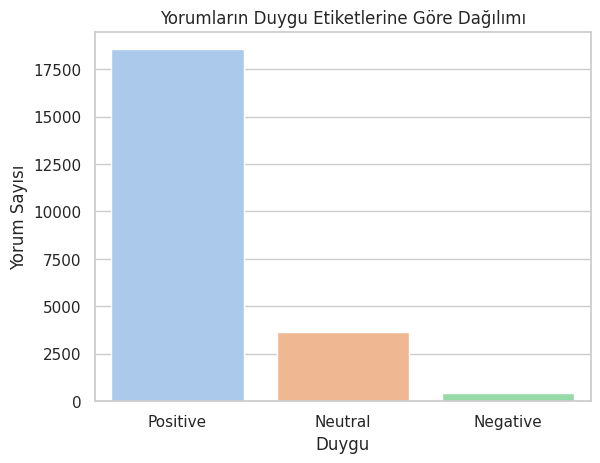

In [ ]:
import seaborn as sns

sns.countplot(x='sentiment_label', data=df, order=['Positive', 'Neutral', 'Negative'], palette='pastel')
plt.title('Yorumların Duygu Etiketlerine Göre Dağılımı')
plt.xlabel('Duygu')
plt.ylabel('Yorum Sayısı')
plt.show()


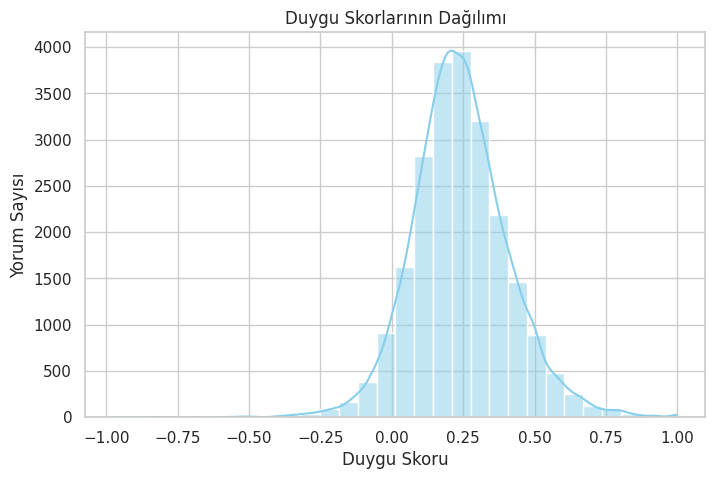

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['sentiment_score'], bins=30, kde=True, color='skyblue')
plt.title('Duygu Skorlarının Dağılımı')
plt.xlabel('Duygu Skoru')
plt.ylabel('Yorum Sayısı')
plt.show()


In [ ]:
# Rating 4 ve 5: Pozitif (1), Rating 1 ve 2: Negatif (0), 3'leri hariç tutuyoruz
df_sentiment = df[df['Rating'] != 3].copy()
df_sentiment['Sentiment'] = df_sentiment['Rating'].apply(lambda x: 1 if x > 3 else 0)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X = tfidf.fit_transform(df_sentiment['cleaned_review'])
y = df_sentiment['Sentiment']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[ 201  277]
 [  35 3451]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.42      0.56       478
           1       0.93      0.99      0.96      3486

    accuracy                           0.92      3964
   macro avg       0.89      0.71      0.76      3964
weighted avg       0.92      0.92      0.91      3964



In [ ]:
# Model, veride olumsuz yorumlar az olduğu için (class imbalance) bu sınıfı öğrenmekte zorlanıyor ve genelde olumlu tahmin ediyor

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# --- 1. Yöntem: class_weight='balanced' kullanımı ---
# class_weight='balanced' parametresi, model eğitimi sırasında
# azınlık sınıfına daha fazla ağırlık vererek sınıf dengesizliğinin etkisini azaltır.
# Bu sayede model, azınlık sınıfı örneklerini daha iyi öğrenmeye çalışır.

model_balanced = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
model_balanced.fit(X_train, y_train)
y_pred_balanced = model_balanced.predict(X_test)

print("Confusion Matrix (class_weight='balanced'):\n", confusion_matrix(y_test, y_pred_balanced))
print("\nClassification Report (class_weight='balanced'):\n", classification_report(y_test, y_pred_balanced))


# --- 2. Yöntem: SMOTE (Synthetic Minority Over-sampling Technique) ---
# SMOTE, azınlık sınıfındaki örneklerden yeni sentetik (yapay) örnekler
# oluşturarak veri setini dengeler.
# Böylece eğitim seti dengeli hale gelir ve model azınlık sınıfını daha iyi öğrenir.

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Yeni eğitim seti boyutları (SMOTE sonrası):", X_train_smote.shape, y_train_smote.shape)

model_smote = LogisticRegression(max_iter=1000, random_state=42)
model_smote.fit(X_train_smote, y_train_smote)
y_pred_smote = model_smote.predict(X_test)

print("Confusion Matrix (SMOTE):\n", confusion_matrix(y_test, y_pred_smote))
print("\nClassification Report (SMOTE):\n", classification_report(y_test, y_pred_smote))


Confusion Matrix (class_weight='balanced'):
 [[ 401   77]
 [ 298 3188]]

Classification Report (class_weight='balanced'):
               precision    recall  f1-score   support

           0       0.57      0.84      0.68       478
           1       0.98      0.91      0.94      3486

    accuracy                           0.91      3964
   macro avg       0.78      0.88      0.81      3964
weighted avg       0.93      0.91      0.91      3964

Yeni eğitim seti boyutları (SMOTE sonrası): (27924, 5000) (27924,)
Confusion Matrix (SMOTE):
 [[ 383   95]
 [ 248 3238]]

Classification Report (SMOTE):
               precision    recall  f1-score   support

           0       0.61      0.80      0.69       478
           1       0.97      0.93      0.95      3486

    accuracy                           0.91      3964
   macro avg       0.79      0.87      0.82      3964
weighted avg       0.93      0.91      0.92      3964



In [ ]:
df.to_excel("veri_seti.xlsx", index=False)



In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack, csr_matrix

# Veri setinin genel bilgisi ve özet
print("=== İlk 5 satır ===")
print(df.head())

print("\n=== Veri tipi ve boş değer sayısı ===")
print(df.info())

print("\n=== Sayısal sütunların özet istatistikleri ===")
print(df.describe())

print("\n=== Eksik değer sayısı ===")
print(df.isnull().sum())

print("\n=== Temizlenmiş yorum metni örnekleri (Cleaned_Review_Text) ===")
print(df['Cleaned_Review_Text'].head())

print("\n=== Sayısal değişkenler örnekleri (Age, Rating, Positive Feedback Count) ===")
print(df[['Age', 'Rating', 'Positive Feedback Count']].head())

print("\n=== Hedef değişken (Recommended IND) sınıf dağılımı ===")
print(df['Recommended IND'].value_counts(normalize=True))

# Metin vektörizasyonu (TF-IDF)
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
review_vectors = tfidf_vectorizer.fit_transform(df['Cleaned_Review_Text'].fillna(''))

print(f"\nTF-IDF vektör matrisi boyutu: {review_vectors.shape}")
print("\nTF-IDF özellik isimleri (ilk 10 kelime):")
print(tfidf_vectorizer.get_feature_names_out()[:10])

# Sayısal özellikler ile metin vektörlerinin birleştirilmesi
X_numeric = df[['Age', 'Rating', 'Positive Feedback Count']].fillna(0).values
X_numeric_sparse = csr_matrix(X_numeric)
X = hstack([review_vectors, X_numeric_sparse])

print(f"\nBirleşik özellik matrisi boyutu: {X.shape}")

# Hedef değişken
y = df['Recommended IND'].fillna(0)  # boşsa 0 yapabiliriz, ya da çıkarabilirsin
print(f"\nHedef değişken boyutu: {y.shape}")
print(f"Hedef değişken benzersiz değerleri: {y.unique()}")



=== İlk 5 satır ===
       Clothing ID  Age                                              Title  \
Index                                                                        
0              767   33  Absolutely wonderful - silky and sexy and comf...   
1             1080   34                 Love this dress!  it's sooo pretty   
2             1077   60                            Some major design flaws   
3             1049   50                                   My favorite buy!   
4              847   47                                   Flattering shirt   

                                             Review Text  Rating  \
Index                                                              
0      Absolutely wonderful - silky and sexy and comf...       4   
1      Love this dress!  it's sooo pretty.  i happene...       5   
2      I had such high hopes for this dress and reall...       3   
3      I love, love, love this jumpsuit. it's fun, fl...       5   
4      This shirt is very

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Eksik satırları temizle (Rating ve diğer 1 eksik varsa)
df_clean = df.dropna(subset=['Rating', 'Recommended IND', 'Positive Feedback Count'])

# Özellik matrisi ve hedef
X_numeric = df_clean[['Age', 'Rating', 'Positive Feedback Count']].values
X_numeric_sparse = csr_matrix(X_numeric)
review_vectors = tfidf_vectorizer.transform(df_clean['Cleaned_Review_Text'].fillna(''))
X = hstack([review_vectors, X_numeric_sparse])
y = df_clean['Recommended IND'].astype(int)

# Eğitim ve test setlerine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Modelleri tanımla
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Modelleri eğit ve değerlendir
results = {}

for name, model in models.items():
    print(f"\nModel: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)

    print(classification_report(y_test, y_pred, zero_division=0))

    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    }

# Sonuçları tablo halinde göster
import pandas as pd
results_df = pd.DataFrame(results).T
print("\nModel Performans Karşılaştırması:")
print(results_df)



Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       820
           1       0.96      0.97      0.96      3709

    accuracy                           0.94      4529
   macro avg       0.90      0.89      0.90      4529
weighted avg       0.94      0.94      0.94      4529


Model: Random Forest
              precision    recall  f1-score   support

           0       0.86      0.76      0.81       820
           1       0.95      0.97      0.96      3709

    accuracy                           0.93      4529
   macro avg       0.90      0.87      0.88      4529
weighted avg       0.93      0.93      0.93      4529


Model: XGBoost


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:13:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

           0       0.81      0.84      0.83       820
           1       0.96      0.96      0.96      3709

    accuracy                           0.94      4529
   macro avg       0.89      0.90      0.89      4529
weighted avg       0.94      0.94      0.94      4529


Model Performans Karşılaştırması:
                     Accuracy  Precision    Recall  F1-Score
Logistic Regression  0.939501   0.960332  0.966029  0.963172
Random Forest        0.933981   0.949157  0.971421  0.960160
XGBoost              0.936189   0.964674  0.957131  0.960888


In [ ]:
import numpy as np

# Logistic Regression modelini tekrar eğit (veya zaten eğitilmiş modeli kullan)
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Özellik isimlerini al (TF-IDF kelimeleri + sayısal özellikler)
tfidf_features = tfidf_vectorizer.get_feature_names_out()
numeric_features = ['Age', 'Rating', 'Positive Feedback Count']
feature_names = list(tfidf_features) + numeric_features

# Katsayıları al
coef = lr_model.coef_[0]

# Katsayıları en yüksek pozitiften en düşük negatife sırala
coef_df = pd.DataFrame({'feature': feature_names, 'coefficient': coef})
coef_df = coef_df.sort_values(by='coefficient', ascending=False)

print("=== En yüksek pozitif etkili özellikler ===")
print(coef_df.head(15))

print("\n=== En yüksek negatif etkili özellikler ===")
print(coef_df.tail(15))


=== En yüksek pozitif etkili özellikler ===
        feature  coefficient
5001     Rating     2.878608
2721     medium     1.861006
4662     unique     1.770273
3474  recommend     1.655257
3915       size     1.635191
1761       fits     1.578341
2993      order     1.550175
599         bit     1.545908
2892     nicely     1.506550
4883       wish     1.446720
4807       wear     1.425457
2613       love     1.386172
2566     little     1.370956
3125    perfect     1.369190
4571        tts     1.256366

=== En yüksek negatif etkili özellikler ===
           feature  coefficient
4256          suit    -1.232652
2944           odd    -1.245478
2343          isnt    -1.252686
1358           did    -1.275158
3668          sack    -1.284525
1655        fabric    -1.289922
2217          huge    -1.401837
2696     maternity    -1.479081
2707         maybe    -1.596755
1614       excited    -1.672046
4772        wanted    -1.675251
2694      material    -1.693640
1384  disappointed    -1.708684

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Logistic Regression modeli ve parametre ızgarası
lr = LogisticRegression(max_iter=1000, solver='liblinear')
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],   # Düzenleme katsayısı
    'penalty': ['l1', 'l2']         # Ceza türü (L1 ya da L2)
}

# GridSearchCV ile 5 katlı çapraz doğrulama ve F1 skoru optimize edilecek
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='f1', n_jobs=-1)

# Eğitim verisi üzerinde arama
grid_search.fit(X_train, y_train)

# En iyi parametreler ve skorlar
print("En iyi parametreler:", grid_search.best_params_)
print("En iyi F1 skoru:", grid_search.best_score_)

# En iyi modeli test setinde değerlendir
best_lr = grid_search.best_estimator_
y_pred = best_lr.predict(X_test)
print(classification_report(y_test, y_pred))


En iyi parametreler: {'C': 1, 'penalty': 'l2'}
En iyi F1 skoru: 0.9640802463823871
              precision    recall  f1-score   support

           0       0.84      0.80      0.82       820
           1       0.96      0.96      0.96      3709

    accuracy                           0.94      4529
   macro avg       0.90      0.88      0.89      4529
weighted avg       0.93      0.94      0.94      4529



In [ ]:
# Rating 4 ve 5: Pozitif (1), Rating 1 ve 2: Negatif (0), 3'leri hariç tutuyoruz
df_sentiment = df[df['Rating'] != 3].copy()
df_sentiment['Sentiment'] = df_sentiment['Rating'].apply(lambda x: 1 if x > 3 else 0)

# TF-IDF vektörizasyonu burada df_sentiment üzerinden
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X = tfidf.fit_transform(df_sentiment['cleaned_review'])  # df_sentiment'deki yorumlar
y = df_sentiment['Sentiment']

print(f"X shape: {X.shape}, y length: {len(y)}, df_sentiment shape: {df_sentiment.shape}")


X shape: (19818, 5000), y length: 19818, df_sentiment shape: (19818, 28)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test, train_idx, test_idx = train_test_split(
    X, y, df_sentiment.index, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test, train_idx, test_idx = train_test_split(
    X, y, df_sentiment.index, test_size=0.2, random_state=42, stratify=y
)

print(f"Train set: {X_train.shape}, Test set: {X_test.shape}")
print(f"Train indices count: {len(train_idx)}, Test indices count: {len(test_idx)}")


Train set: (15854, 5000), Test set: (3964, 5000)
Train indices count: 15854, Test indices count: 3964


In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000, C=1, penalty='l2')  # Hiperparametrelerle
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [ ]:
import pandas as pd

results = df_sentiment.loc[test_idx].copy()
results['y_true'] = y_test.values
results['y_pred'] = y_pred


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[ 219  255]
 [  42 3448]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.46      0.60       474
           1       0.93      0.99      0.96      3490

    accuracy                           0.93      3964
   macro avg       0.89      0.72      0.78      3964
weighted avg       0.92      0.93      0.92      3964



In [ ]:
tfidf_feature_names = tfidf.get_feature_names_out()


In [ ]:
coef = model.coef_[0]


In [ ]:
import numpy as np

top_pos_indices = np.argsort(coef)[-15:]
top_neg_indices = np.argsort(coef)[:15]

print("=== En yüksek pozitif etkili özellikler ===")
for i in top_pos_indices[::-1]:
    print(f"{tfidf_feature_names[i]}: {coef[i]:.4f}")

print("\n=== En yüksek negatif etkili özellikler ===")
for i in top_neg_indices:
    print(f"{tfidf_feature_names[i]}: {coef[i]:.4f}")


=== En yüksek pozitif etkili özellikler ===
little: 5.2600
love: 5.2443
comfortable: 4.6842
perfect: 4.5131
great: 4.4859
fits: 3.4662
soft: 3.4330
bit: 3.2845
compliments: 3.1467
perfectly: 2.8526
happy: 2.7052
casual: 2.5565
nice: 2.5071
glad: 2.4273
beautiful: 2.3814

=== En yüksek negatif etkili özellikler ===
disappointed: -5.5691
wanted: -4.4089
cheap: -4.3675
unflattering: -4.0932
returned: -3.7415
huge: -3.4517
looked: -3.2256
awful: -3.1532
bad: -3.0106
way: -2.9229
returning: -2.9126
poor: -2.8833
excited: -2.8466
fabric: -2.7857
return: -2.7717


In [ ]:
false_positive = results[(results['y_true'] == 0) & (results['y_pred'] == 1)]
false_negative = results[(results['y_true'] == 1) & (results['y_pred'] == 0)]

print(f"Yanlış pozitif sayısı: {false_positive.shape[0]}")
print(f"Yanlış negatif sayısı: {false_negative.shape[0]}")

# Örnek yanlış pozitif yorumlar
print(false_positive[['cleaned_review', 'Rating']].head())

# Örnek yanlış negatif yorumlar
print(false_negative[['cleaned_review', 'Rating']].head())


Yanlış pozitif sayısı: 255
Yanlış negatif sayısı: 42
                                          cleaned_review  Rating
Index                                                           
5540   i bought this top in the blue motif and loved ...       2
20673  i was so excited when i ordered this i love co...       1
581    the back of this tshirt looks cute but the fro...       2
16726  not a pretty blouse its quite utilitarian in d...       1
20179  fits large wrinkles easily and not what i expe...       2
                                          cleaned_review  Rating
Index                                                           
13717  i tried on xs in the store returned and it loo...       4
13895  i was really excited to get these pants but wa...       4
10395  i liked the way the dress looked in the front ...       4
9684   i wasnt excited enough about this to purchase ...       4
4427   i like the way the skirt of the dress swings w...       4


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# 1. TF-IDF ile unigram + bigram (n-gram range 1-2) oluştur
tfidf = TfidfVectorizer(max_features=5000, stop_words='english', ngram_range=(1,2))

X = tfidf.fit_transform(df_sentiment['cleaned_review'])
y = df_sentiment['Sentiment']

# 2. Veri setini böl (train/test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Lojistik regresyon modeli eğit
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 4. Tahmin ve rapor
y_pred = model.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 5. Önemli özellikleri göster (koefisiyentlere göre)
import numpy as np
feature_names = tfidf.get_feature_names_out()
coef = model.coef_[0]
top_positive_coefficients = np.argsort(coef)[-15:]
top_negative_coefficients = np.argsort(coef)[:15]

print("=== En yüksek pozitif etkili kelimeler ===")
for i in top_positive_coefficients[::-1]:
    print(f"{feature_names[i]}: {coef[i]:.4f}")

print("\n=== En yüksek negatif etkili kelimeler ===")
for i in top_negative_coefficients:
    print(f"{feature_names[i]}: {coef[i]:.4f}")


Confusion Matrix:
 [[ 205  273]
 [  34 3452]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.43      0.57       478
           1       0.93      0.99      0.96      3486

    accuracy                           0.92      3964
   macro avg       0.89      0.71      0.76      3964
weighted avg       0.92      0.92      0.91      3964

=== En yüksek pozitif etkili kelimeler ===
love: 5.6042
little: 4.6383
great: 4.3809
perfect: 4.2408
comfortable: 4.1261
fits: 3.5061
bit: 3.4063
soft: 3.3168
compliments: 3.1648
unique: 2.5849
nice: 2.5753
happy: 2.5541
beautiful: 2.3596
casual: 2.2981
perfectly: 2.2587

=== En yüksek negatif etkili kelimeler ===
disappointed: -5.9404
unflattering: -4.4442
cheap: -4.2342
wanted love: -4.0668
returned: -3.7527
returning: -3.7339
bad: -3.7310
awful: -3.2936
huge: -3.2365
going: -3.1781
unfortunately: -3.1462
wanted: -3.0784
fabric: -2.9295
looks like: -2.9106
return: -2.9031


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Sınıf ağırlıklı Logistic Regression modeli
balanced_model = LogisticRegression(max_iter=1000, class_weight='balanced')
balanced_model.fit(X_train, y_train)

# Tahminler
y_pred_balanced = balanced_model.predict(X_test)

# Sonuçları yazdır
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_balanced))
print("\nClassification Report:\n", classification_report(y_test, y_pred_balanced))


Confusion Matrix:
 [[ 393   85]
 [ 277 3209]]

Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.82      0.68       478
           1       0.97      0.92      0.95      3486

    accuracy                           0.91      3964
   macro avg       0.78      0.87      0.82      3964
weighted avg       0.93      0.91      0.92      3964



In [ ]:
import numpy as np

# Güncel kelime ağırlıkları (coefficient'lar)
coef = model.coef_[0]
feature_names = tfidf.get_feature_names_out()

# En pozitif etkili kelimeler
top_positive = sorted(zip(coef, feature_names), reverse=True)[:15]

# En negatif etkili kelimeler
top_negative = sorted(zip(coef, feature_names))[:15]

print("=== En yüksek pozitif etkili kelimeler ===")
for c, f in top_positive:
    print(f"{f}: {c:.4f}")

print("\n=== En yüksek negatif etkili kelimeler ===")
for c, f in top_negative:
    print(f"{f}: {c:.4f}")


=== En yüksek pozitif etkili kelimeler ===
love: 5.6042
little: 4.6383
great: 4.3809
perfect: 4.2408
comfortable: 4.1261
fits: 3.5061
bit: 3.4063
soft: 3.3168
compliments: 3.1648
unique: 2.5849
nice: 2.5753
happy: 2.5541
beautiful: 2.3596
casual: 2.2981
perfectly: 2.2587

=== En yüksek negatif etkili kelimeler ===
disappointed: -5.9404
unflattering: -4.4442
cheap: -4.2342
wanted love: -4.0668
returned: -3.7527
returning: -3.7339
bad: -3.7310
awful: -3.2936
huge: -3.2365
going: -3.1781
unfortunately: -3.1462
wanted: -3.0784
fabric: -2.9295
looks like: -2.9106
return: -2.9031


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000, stop_words='english', ngram_range=(1, 2))
X = tfidf.fit_transform(df_sentiment['cleaned_review'])


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# N-gram (unigram + bigram) temsili
tfidf = TfidfVectorizer(max_features=5000, stop_words='english', ngram_range=(1, 2))
X = tfidf.fit_transform(df_sentiment['cleaned_review'])

# Yeniden train-test bölmesi (indeksleri koruyarak)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, df_sentiment['Sentiment'], test_size=0.2, random_state=42, stratify=df_sentiment['Sentiment']
)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# TF-IDF: Unigram + Bigram
tfidf = TfidfVectorizer(max_features=5000, stop_words='english', ngram_range=(1, 2))
X = tfidf.fit_transform(df_sentiment['cleaned_review'])
y = df_sentiment['Sentiment']

# Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Model: class_weight balanced
model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Sonuçlar
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[ 405   69]
 [ 295 3195]]

Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.85      0.69       474
           1       0.98      0.92      0.95      3490

    accuracy                           0.91      3964
   macro avg       0.78      0.88      0.82      3964
weighted avg       0.93      0.91      0.92      3964



In [ ]:
import numpy as np

feature_names = tfidf.get_feature_names_out()
coefs = model.coef_[0]
top_positive = np.argsort(coefs)[-15:][::-1]
top_negative = np.argsort(coefs)[:15]

print("=== En yüksek pozitif etkili kelimeler ===")
for i in top_positive:
    print(f"{feature_names[i]}: {coefs[i]:.4f}")

print("\n=== En yüksek negatif etkili kelimeler ===")
for i in top_negative:
    print(f"{feature_names[i]}: {coefs[i]:.4f}")


=== En yüksek pozitif etkili kelimeler ===
love: 6.8552
little: 6.2301
comfortable: 5.3958
perfect: 5.2886
great: 4.8994
soft: 4.2050
fits: 4.0408
bit: 3.7292
compliments: 3.6985
happy: 3.5018
casual: 3.3881
perfectly: 3.1812
nice: 2.9670
comfy: 2.9460
glad: 2.8034

=== En yüksek negatif etkili kelimeler ===
disappointed: -6.9391
wanted love: -5.2883
cheap: -4.6316
unflattering: -4.5911
returned: -4.4827
return: -4.2072
huge: -4.1650
fabric: -4.0047
bad: -3.8623
way: -3.8556
returning: -3.8532
awful: -3.7511
wanted: -3.6828
unfortunately: -3.6521
excited: -3.3492


In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip


--2025-05-27 15:21:51--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-05-27 15:21:51--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-05-27 15:21:51--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip.2’

gl

In [ ]:
import numpy as np

# GloVe dosyasını yükleyip bir sözlük olarak tut
def load_glove_embeddings(glove_file_path):
    embeddings = {}
    with open(glove_file_path, 'r', encoding='utf8') as f:
        for line in f:
            parts = line.strip().split()
            word = parts[0]
            vector = np.array(parts[1:], dtype=np.float32)
            embeddings[word] = vector
    return embeddings

glove_path = "glove.6B.100d.txt"
glove_embeddings = load_glove_embeddings(glove_path)


In [ ]:
import pandas as pd

# Temizlenmiş yorumları içeren sütun adın buysa:
reviews = df_sentiment['cleaned_review']

def get_review_vector(review, embeddings, dim=100):
    words = review.split()
    vectors = [embeddings[word] for word in words if word in embeddings]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(dim)

X_glove = np.vstack([get_review_vector(text, glove_embeddings) for text in reviews])


In [ ]:
import pandas as pd

# Temizlenmiş yorumları içeren sütun adın buysa:
reviews = df_sentiment['cleaned_review']

def get_review_vector(review, embeddings, dim=100):
    words = review.split()
    vectors = [embeddings[word] for word in words if word in embeddings]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(dim)

X_glove = np.vstack([get_review_vector(text, glove_embeddings) for text in reviews])


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

y = df_sentiment['Sentiment']  # 0/1 sınıfları

X_train, X_test, y_train, y_test = train_test_split(X_glove, y, test_size=0.2, random_state=42)

model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[ 393   85]
 [ 612 2874]]

Classification Report:
               precision    recall  f1-score   support

           0       0.39      0.82      0.53       478
           1       0.97      0.82      0.89      3486

    accuracy                           0.82      3964
   macro avg       0.68      0.82      0.71      3964
weighted avg       0.90      0.82      0.85      3964



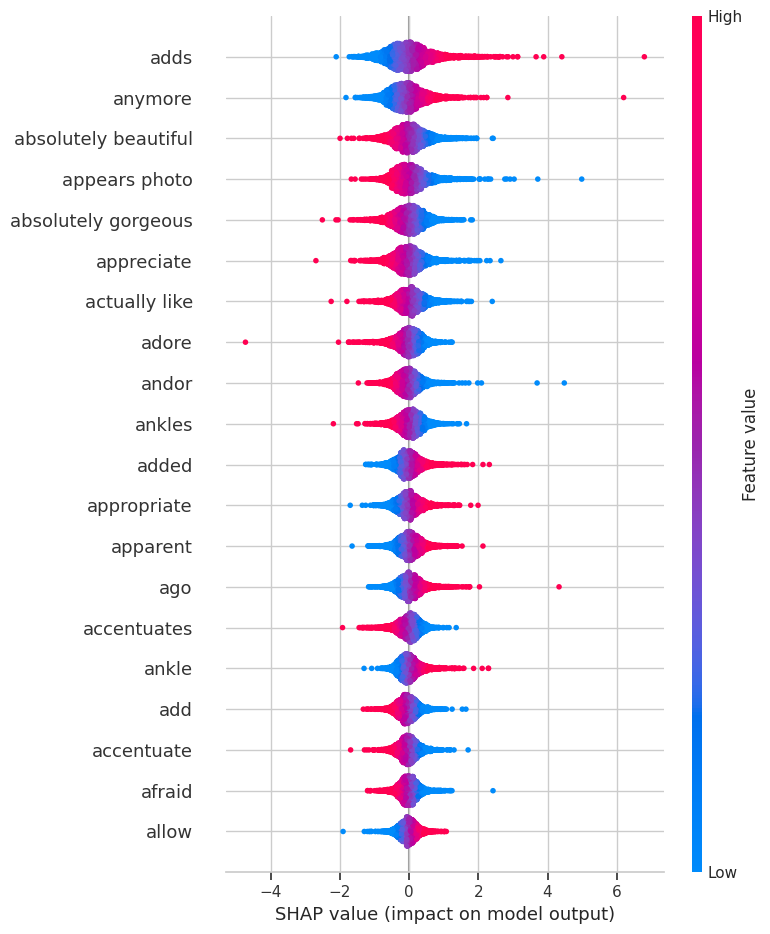

In [ ]:
import shap

# X_train ve X_test zaten numpy array ise direk kullanabilirsin
masker = shap.maskers.Independent(data=X_train)

explainer = shap.LinearExplainer(model, masker=masker)

shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, features=X_test, feature_names=tfidf.get_feature_names_out())



In [ ]:
# Örnek: Yorum uzunluğu (kelime sayısı)
df_sentiment['review_length'] = df_sentiment['cleaned_review'].apply(lambda x: len(x.split()))

# Tavsiye durumu: rating 4 ve üzeri ise 1, değilse 0
df_sentiment['recommend'] = df_sentiment['Rating'].apply(lambda x: 1 if x >= 4 else 0)

# Kullanacağımız özellikler
features = df_sentiment[['Rating', 'recommend', 'review_length']]


In [ ]:
from sklearn.preprocessing import StandardScaler

# Sadece sayısal özellikler
X_seg = df_sentiment[['Rating', 'recommend', 'review_length']]

# Standardizasyon
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_seg)


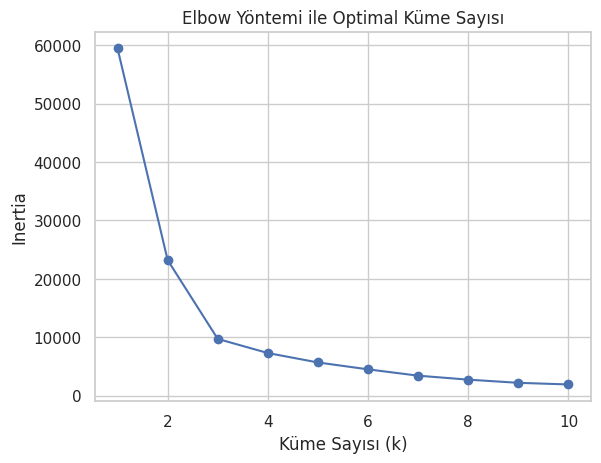

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(k_values, inertia, marker='o')
plt.xlabel('Küme Sayısı (k)')
plt.ylabel('Inertia')
plt.title('Elbow Yöntemi ile Optimal Küme Sayısı')
plt.show()


In [ ]:
# Örnek: 3 küme
kmeans = KMeans(n_clusters=3, random_state=42)
df_sentiment['cluster'] = kmeans.fit_predict(X_scaled)


In [ ]:
print(df_sentiment['cluster'].value_counts())


cluster
2    9328
1    8120
0    2370
Name: count, dtype: int64


In [ ]:
print(df_sentiment.columns)



Index(['Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name', 'Cleaned_Review_Text', 'Cleaned_Title',
       'review_length', 'review_word_count', 'cleaned_review', 'Age_Group',
       'ReviewText_missing', 'Title_missing', 'log_Positive_Feedback',
       'sentiment_scores', 'sentiment_pos', 'sentiment_neg', 'sentiment_neu',
       'sentiment_compound', 'sentiment_label', 'sentiment_score',
       'sentiment_category', 'Sentiment', 'recommend', 'cluster'],
      dtype='object')


In [ ]:
df_sentiment.groupby('cluster')[['Age', 'review_length', 'Rating', 'Recommended IND']].mean()


,Age,review_length,Rating,Recommended IND
cluster,,,,
0,42.990717,60.033333,1.653586,0.045992
1,43.792241,84.991995,4.679680,0.986946
2,43.246462,35.413486,4.752680,0.991316


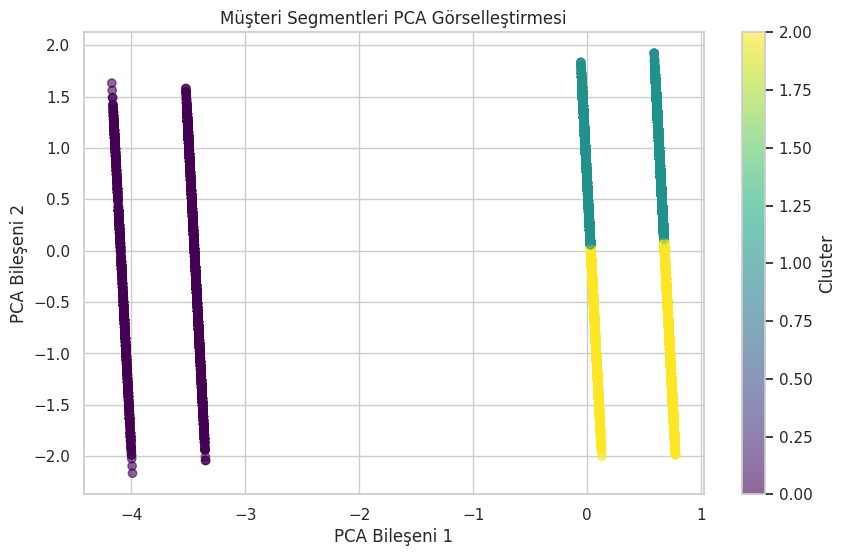

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 1. PCA ile 2 bileşene indirgeme
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# 2. Scatter plot çizimi
plt.figure(figsize=(10,6))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=df_sentiment['cluster'], cmap='viridis', alpha=0.6)

plt.title('Müşteri Segmentleri PCA Görselleştirmesi')
plt.xlabel('PCA Bileşeni 1')
plt.ylabel('PCA Bileşeni 2')
plt.colorbar(scatter, label='Cluster')
plt.show()


In [ ]:
for cluster_id in df_sentiment['cluster'].unique():
    print(f"\n--- Cluster {cluster_id} Örnek Yorumlar ---\n")
    examples = df_sentiment[df_sentiment['cluster'] == cluster_id]['cleaned_review'].sample(3, random_state=42)
    for i, review in enumerate(examples, 1):
        print(f"{i}. {review}\n")



--- Cluster 2 Örnek Yorumlar ---

1. love the fabric comfortable to wear with jeans or a dress good for those cool fall mornings

2. just received first pair in brownlove them and ordered two more these tights actually stay up and you dont have to keep pulling on them throughout the day super comfortable and perfect weight not too thick and not too thin they will run so be careful when washing or putting them on

3. very soft and luxe materials and really well made pockets a nice detail and otherwise a great cut and length petticoat underneath a cool detail too


--- Cluster 1 Örnek Yorumlar ---

1. this is a very beautiful summer dress with plenty of lightweight fabric i loved the colors and the design i know that some other reviewer complained that this is polyester and it is but it feels like chiffon the only two complaints i have are the dress is large so go a size smaller than you would normally and this is dry clean only if this is polyester why would they suggest that it should

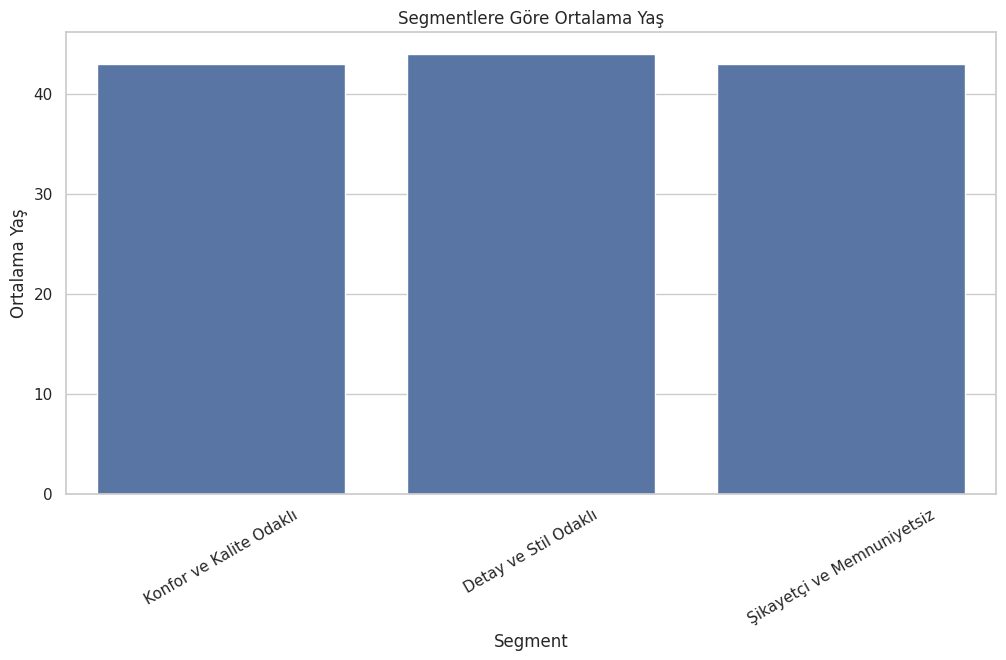

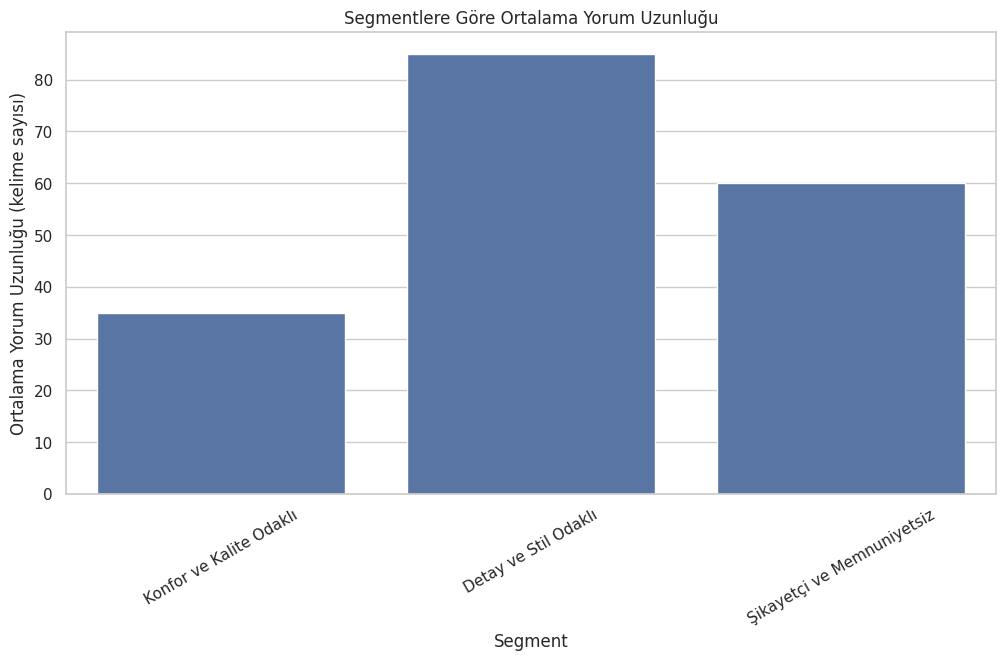

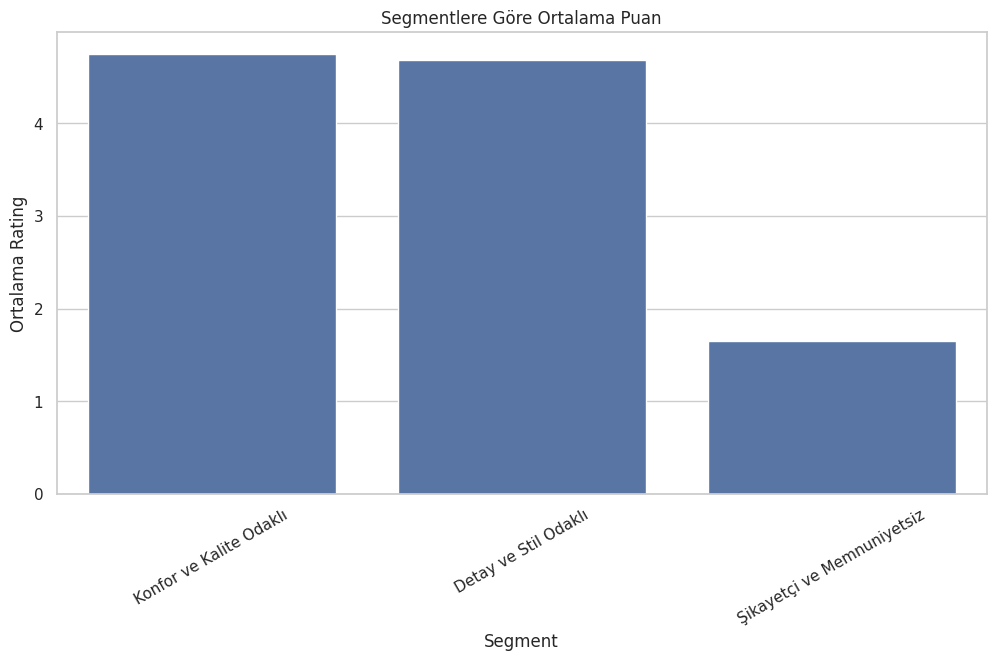

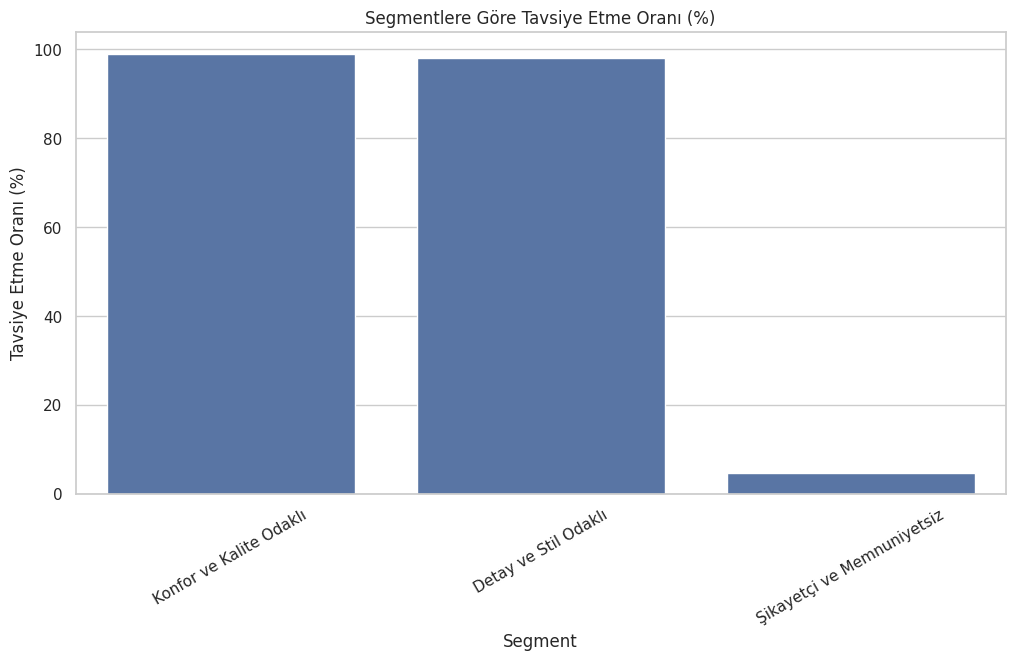

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Segment ortalamaları
segment_means = {
    'Segment': ['Konfor ve Kalite Odaklı', 'Detay ve Stil Odaklı', 'Şikayetçi ve Memnuniyetsiz'],
    'Yaş': [43, 44, 43],
    'Yorum Uzunluğu': [35, 85, 60],
    'Ortalama Rating': [4.75, 4.68, 1.65],
    'Tavsiye Oranı': [99, 98, 4.6]
}

df_segments = pd.DataFrame(segment_means)

# Yaş grafiği
plt.figure(figsize=(12,6))
sns.barplot(x='Segment', y='Yaş', data=df_segments)
plt.title('Segmentlere Göre Ortalama Yaş')
plt.ylabel('Ortalama Yaş')
plt.xticks(rotation=30)
plt.show()

# Yorum Uzunluğu grafiği
plt.figure(figsize=(12,6))
sns.barplot(x='Segment', y='Yorum Uzunluğu', data=df_segments)
plt.title('Segmentlere Göre Ortalama Yorum Uzunluğu')
plt.ylabel('Ortalama Yorum Uzunluğu (kelime sayısı)')
plt.xticks(rotation=30)
plt.show()

# Ortalama Rating grafiği
plt.figure(figsize=(12,6))
sns.barplot(x='Segment', y='Ortalama Rating', data=df_segments)
plt.title('Segmentlere Göre Ortalama Puan')
plt.ylabel('Ortalama Rating')
plt.xticks(rotation=30)
plt.show()

# Tavsiye Oranı grafiği
plt.figure(figsize=(12,6))
sns.barplot(x='Segment', y='Tavsiye Oranı', data=df_segments)
plt.title('Segmentlere Göre Tavsiye Etme Oranı (%)')
plt.ylabel('Tavsiye Etme Oranı (%)')
plt.xticks(rotation=30)
plt.show()


In [220]:
from sklearn.cluster import MiniBatchKMeans

# 3. MiniBatchKMeans clustering
k = 5
mb_kmeans = MiniBatchKMeans(n_clusters=k, random_state=42, batch_size=1000)
clusters = mb_kmeans.fit_predict(X_tfidf)

df_sentiment['text_cluster'] = clusters

# Örnek yorumlar
for cluster_num in range(k):
    print(f"--- Cluster {cluster_num} Örnek Yorumlar ---")
    sample_texts = df_sentiment[df_sentiment['text_cluster'] == cluster_num]['cleaned_review'].sample(3, random_state=42).values
    for i, text in enumerate(sample_texts, 1):
        print(f"{i}. {text}\n")


--- Cluster 0 Örnek Yorumlar ---
1. i knew this jacket would be mine as soon as i saw it online but i also have a hard time trusting retailers online photos by their color and angle etc i took a gamble and for the most part it paid off i do like the jackets unique bohemian gone chicuptown styling and the gorgeous patten with a spattering of embroidery on the chest and back what i dont like is the mix of black leather trim and big brass studs i feel like there might be one too many ideas or they could have been toned

2. i tried this on in the store and almost considered buying it until i looked at the price tag i think its unique and interesting i just dont think its worth the the fabric is nothing special and the construction is not complicated enough to warrant the cost i would consider it on sale retailer has more interesting sweaters made with softer blends for a similar price all things considered i dont think its a smart purchase

3. i was a little bit afraid to purchase this bec

In [221]:
# Etiketleri belirle
cluster_labels = {
    0: "Eleştirel ve seçici müşteriler",
    1: "Memnun ve sadık müşteriler",
    2: "Genç ve pozitif müşteriler",
    3: "Rahat ve sadık müşteriler",      # 3 ve 4 için örnek verilebilir, yoksa çıkarabiliriz
    4: "Trend takipçisi ve detaycı müşteriler"
}

# DataFrame'e yeni 'cluster_label' sütunu ekle
df_sentiment['cluster_label'] = df_sentiment['cluster'].map(cluster_labels)

# Kontrol edelim
print(df_sentiment[['cluster', 'cluster_label']].head())


       cluster                   cluster_label
Index                                         
0            2      Genç ve pozitif müşteriler
1            1      Memnun ve sadık müşteriler
3            2      Genç ve pozitif müşteriler
4            2      Genç ve pozitif müşteriler
5            0  Eleştirel ve seçici müşteriler


In [222]:
# 2. Etiketleri DataFrame'e ekle
df_sentiment['cluster_label'] = df_sentiment['cluster'].map(cluster_labels)

# 3. Segmentlerin ortalama özelliklerini hesapla
segment_summary = df_sentiment.groupby('cluster_label')[['Age', 'review_length', 'Rating', 'Recommended IND']].mean()

# 4. Sonuçları göster
print(segment_summary)

                                      Age  review_length    Rating  \
cluster_label                                                        
Eleştirel ve seçici müşteriler  42.990717      60.033333  1.653586   
Genç ve pozitif müşteriler      43.246462      35.413486  4.752680   
Memnun ve sadık müşteriler      43.792241      84.991995  4.679680   

                                Recommended IND  
cluster_label                                    
Eleştirel ve seçici müşteriler         0.045992  
Genç ve pozitif müşteriler             0.991316  
Memnun ve sadık müşteriler             0.986946  


In [ ]:
# Eğer yüklü değilse, Gensim ve nltk yükle
!pip install gensim nltk --quiet

import pandas as pd
import nltk
from nltk.corpus import stopwords
from gensim import corpora, models
import re
nltk.download('stopwords')
